In [1]:
import logging
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from pyobsbox import Checker

In [3]:
logging.getLogger("pyobsbox").setLevel(logging.WARNING)
logging.getLogger("pyobsbox.plotter").setLevel(logging.DEBUG)

# List models

In [4]:
models_folder = Path("../../models")

In [5]:
[model.name for model in list(models_folder.glob('model_*'))]

['model_conv_64_32_16_8_stride_4_B1H_Inst_znorm_abs_diff_seed_42',
 'model_dense_512_128_32_8_B1H_Inst_center_scale_100_seed_42',
 'model_conv_64_32_16_8_stride_4_B1H_Inst_znorm_seed_42',
 'model_time_dist_32_16_B1H_Inst_500',
 'model_conv_64_32_16_8_stride_4_noDO_decode_B1H_Inst_center_scale_100_seed_42',
 'model_conv_32_16_stride_4_B1H_Inst',
 'model_conv_32_16_stride_4_B1H_Inst_jorg',
 'model_conv_max_pool_64_32_16_8_stride_4_B1H_Inst_center_scale_100_seed_42',
 'model_conv_32_16_8_stride_4_B1H_Inst_presplit_center_scale_1000_seed_42',
 'model_conv_64_32_16_8_stride_4_noDO_decode_B1H_Inst_min_max_rolling_avg_std_window_2049_seed_42',
 'model_conv_32_16_8_stride_4_B1H_Inst_center_scale_10000_seed_42',
 'model_conv_32_16_8_stride_4_B1H_Inst_center_scale_1000_seed_42',
 'model_conv_32_16_8_stride_4_B1H_Inst_center_scale_100_seed_42',
 'model_conv_32_16_8_stride_4_B1H_Inst_presplit_center_scale_100_seed_42',
 'model_conv_32_16_8_stride_4_B1H_Inst_presplit_znorm_seed_42',
 'model_conv_32

In [6]:
model_path = models_folder / "model_conv_64_32_16_8_stride_4_noDO_decode_B1H_Inst_min_max_rolling_avg_std_window_17_seed_42"

In [7]:
checker = Checker(model_path)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 512, 64)           704       
_________________________________________________________________
dropout (Dropout)            (None, 512, 64)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 128, 32)           10272     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128, 32)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 32, 16)            2576      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32, 16)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 8, 8)              6

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

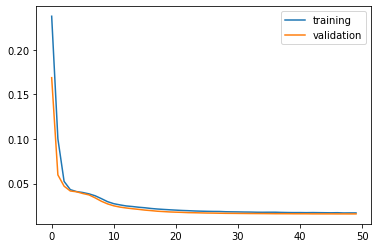

In [8]:
checker.plot_loss()

In [9]:
train_data, train_meta = checker.load_train_dataset()
train_prediction = checker.predict(train_data)

bunch_sorted_index: [0 1 2]
group_bunches: [2065. 2127. 2964.]
group_bunches sorted: [2065. 2127. 2964.]
restore_index: [0 1 2]
group_bunches restored: [2065. 2127. 2964.]
bunch_sorted_index: [1 0 2]
group_bunches: [576. 289. 652.]
group_bunches sorted: [289. 576. 652.]
restore_index: [1 0 2]
group_bunches restored: [576. 289. 652.]

50/50 [==============================] - 92s 2s/step


In [10]:
train_meta.head()

type  fill  beam plane  q           date_time  \
4674  Inst  6775     1     h  7 2018-06-11 15:17:11   
2800  Inst  6938     1     h  7 2018-07-17 21:16:39   
6197  Inst  6890     1     h  7 2018-07-05 16:51:15   
3359  Inst  6243     1     h  7 2017-09-26 07:07:15   
7716  Inst  7156     1     h  7 2018-09-13 00:53:14   

                                                   file  n_bunches  \
4674  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6775/...        636   
2800  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6938/...        636   
6197  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6890/...       1452   
3359  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6243/...       1916   
7716  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7156/...         12   

      bunch_index  bunch_number  ts_length  chunk  
4674        219.0         132.0      65536     18  
2800        327.0         226.0      65536     10  
6197       3182.0        1346.0      65536     24  
3359        288.0         152.0      65536     13  
7716         26.0           8.0      65536     30

In [11]:
train_meta.shape

(396800, 12)

In [12]:
train_data.shape

(396800, 2048, 2)

In [13]:
train_prediction.shape

(396800, 2048, 2)

In [14]:
validation_data, validation_meta = checker.load_validation_dataset()
validation_prediction = checker.predict(validation_data)


5/5 [==============================] - 5s 948ms/step


In [15]:
validation_meta.head()

type  fill  beam plane  q           date_time  \
4808  Inst  6595     1     h  7 2018-04-23 01:47:14   
1244  Inst  6890     1     h  7 2018-07-05 21:03:15   
5767  Inst  6972     1     h  7 2018-07-24 23:40:14   
7206  Inst  6690     1     h  7 2018-05-16 12:43:14   
7624  Inst  6595     1     h  7 2018-04-23 01:47:14   

                                                   file  n_bunches  \
4808  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6595/...        339   
1244  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6890/...       1452   
5767  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6972/...        158   
7206  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6690/...       1227   
7624  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6595/...        339   

      bunch_index  bunch_number  ts_length  chunk  
4808        214.0          58.0      65536     18  
1244       2300.0         974.0      65536      4  
5767        111.0          13.0      65536     22  
7206       1072.0         343.0      65536     28  
7624        214.0          58.0      65536     29

In [16]:
validation_meta.shape

(39680, 12)

In [17]:
validation_data.shape

(39680, 2048, 2)

In [18]:
validation_prediction.shape

(39680, 2048, 2)

In [19]:
def plot_train_index(index: int):
    """Helper function to plot a sample from the train dataset.
    """
    true_signal = train_data[index]
    predicted_signal = train_prediction[index]
    metadata_row = train_meta.iloc[index]
    print(f"index: {index}")
    print(f"Error: {train_error[index]}")
    print(metadata_row)
    checker.plot_sample(metadata_row, true_signal, predicted_signal)
    plt.show()
    encoded = checker.encode(true_signal)
    plt.imshow(encoded)
    plt.show()

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

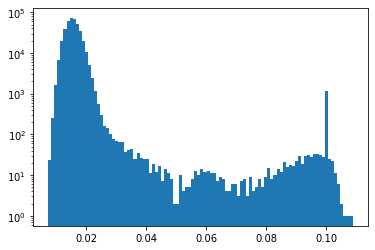

In [20]:
train_error = checker.MSE(train_data, train_prediction)
checker.plot_error(train_error, bins=100)

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

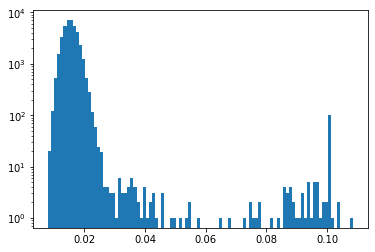

In [21]:
validation_error = checker.MSE(validation_data, validation_prediction)
checker.plot_error(validation_error, bins=100)

In [22]:
# Histogram peak
hist, bins = np.histogram(train_error, bins=100)
hist_peak = bins[np.argmax(hist)]

index: 0
Error: 0.01174042974600077
type                                                         Inst
fill                                                         6775
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-06-11 15:17:11
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6775/...
n_bunches                                                     636
bunch_index                                                   219
bunch_number                                                  132
ts_length                                                   65536
chunk                                                          18
Name: 4674, dtype: object


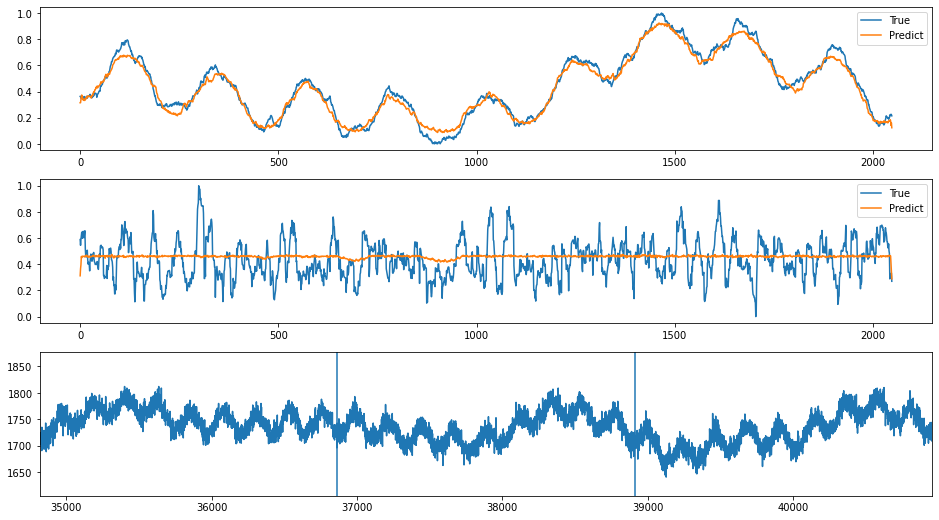

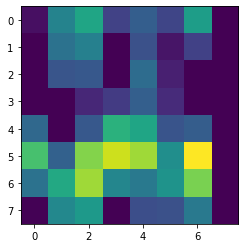

In [23]:
# plotting a random sample
plot_train_index(0)

In [24]:
sorted_error_indices = np.argsort(train_error)

# From left to right

index: 118287
Error: 0.0073010809408482116
type                                                         Inst
fill                                                         6272
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-05 08:31:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6272/...
n_bunches                                                    1836
bunch_index                                                  1581
bunch_number                                                  843
ts_length                                                   65536
chunk                                                          12
Name: 3223, dtype: object


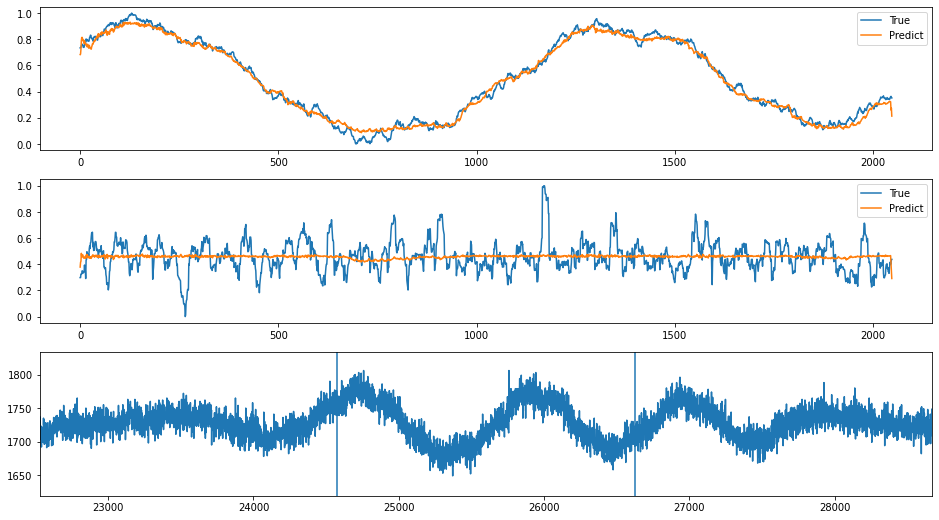

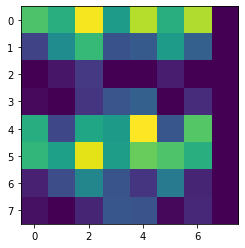

index: 293535
Error: 0.007847692438270071
type                                                         Inst
fill                                                         6712
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-05-22 17:37:55
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6712/...
n_bunches                                                    1212
bunch_index                                                   415
bunch_number                                                  264
ts_length                                                   65536
chunk                                                          18
Name: 4823, dtype: object


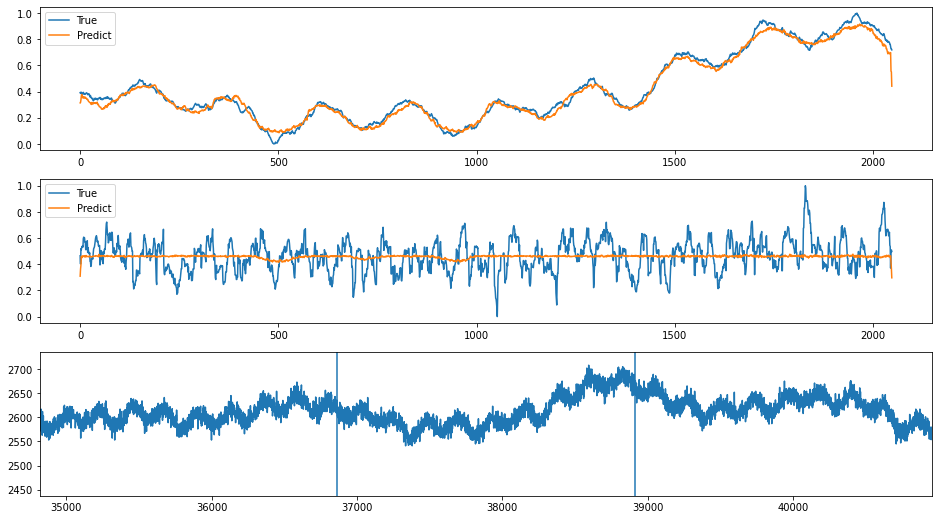

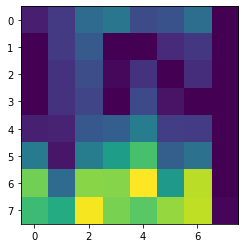

index: 132598
Error: 0.007924511170204231
type                                                         Inst
fill                                                         6972
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-07-24 23:33:15
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6972/...
n_bunches                                                     158
bunch_index                                                   379
bunch_number                                                  123
ts_length                                                   65536
chunk                                                          29
Name: 7651, dtype: object


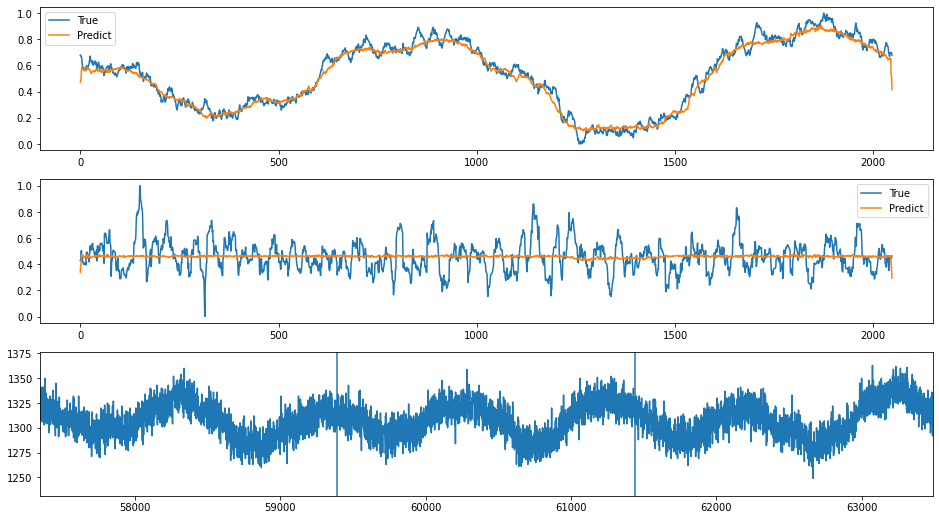

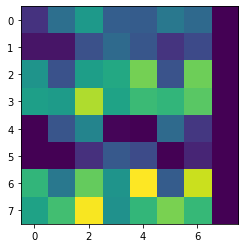

index: 191818
Error: 0.007954993040270636
type                                                         Inst
fill                                                         6693
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-05-17 03:36:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6693/...
n_bunches                                                    1887
bunch_index                                                  1936
bunch_number                                                 1055
ts_length                                                   65536
chunk                                                           9
Name: 2394, dtype: object


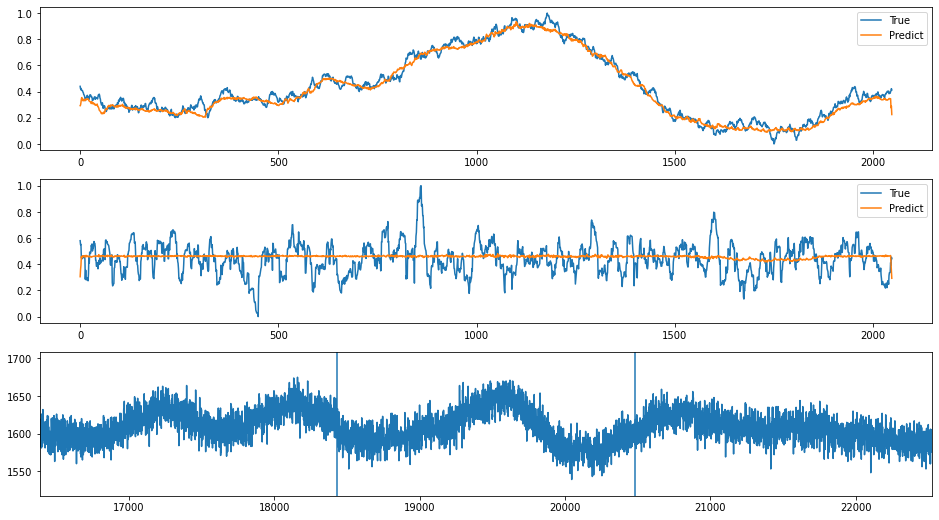

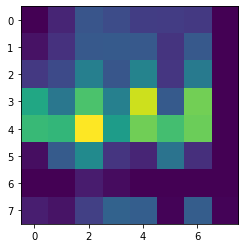

index: 144838
Error: 0.007977881732296245
type                                                         Inst
fill                                                         6343
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-28 19:04:19
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6343/...
n_bunches                                                    1868
bunch_index                                                   258
bunch_number                                                  132
ts_length                                                   65536
chunk                                                          13
Name: 3571, dtype: object


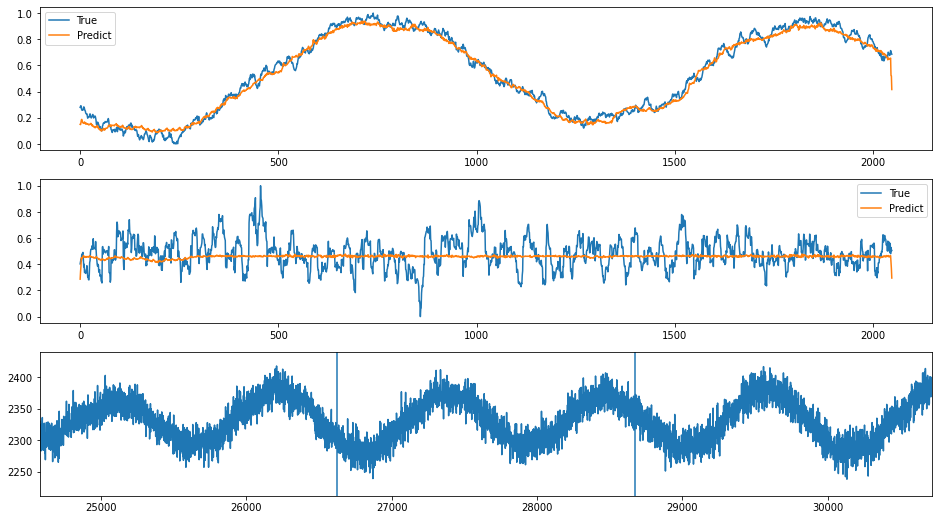

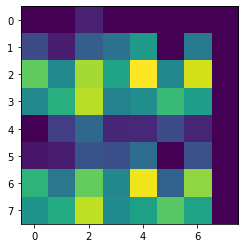

index: 190055
Error: 0.008029201365362466
type                                                         Inst
fill                                                         7479
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-11-27 21:18:15
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7479/...
n_bunches                                                     187
bunch_index                                                   524
bunch_number                                                  110
ts_length                                                   65536
chunk                                                          20
Name: 5362, dtype: object


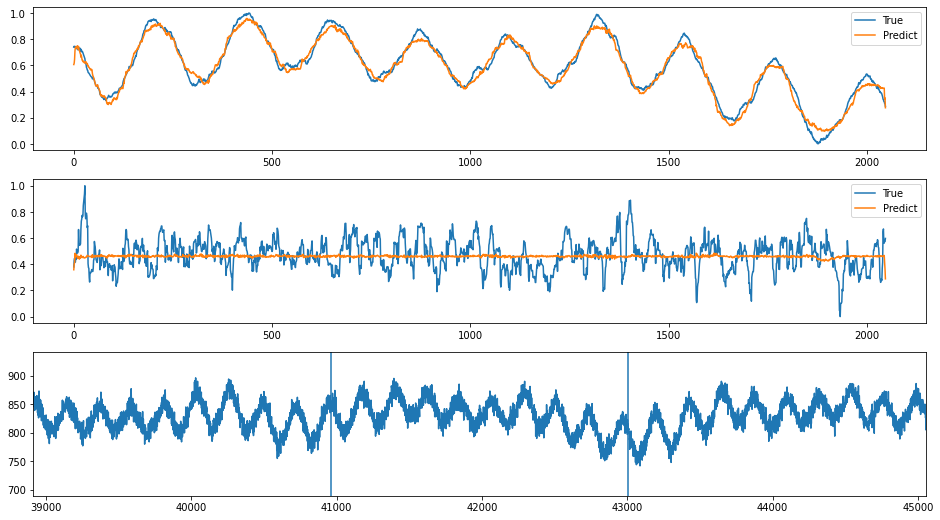

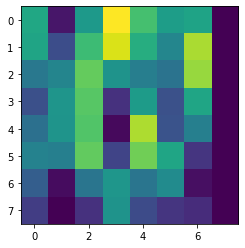

index: 211963
Error: 0.008036961065039637
type                                                         Inst
fill                                                         7063
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-08-18 14:53:12
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7063/...
n_bunches                                                    1068
bunch_index                                                   458
bunch_number                                                  319
ts_length                                                   65536
chunk                                                           7
Name: 1855, dtype: object


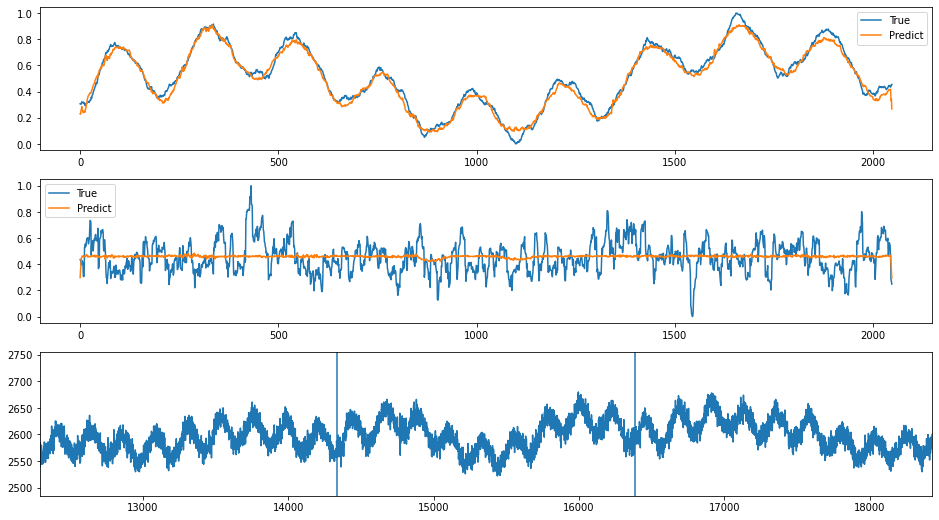

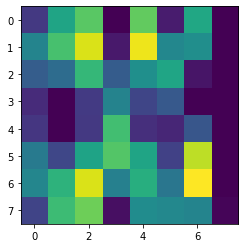

index: 29261
Error: 0.008068633580797766
type                                                         Inst
fill                                                         7324
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-21 05:19:40
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7324/...
n_bunches                                                     540
bunch_index                                                   223
bunch_number                                                  136
ts_length                                                   65536
chunk                                                          16
Name: 4326, dtype: object


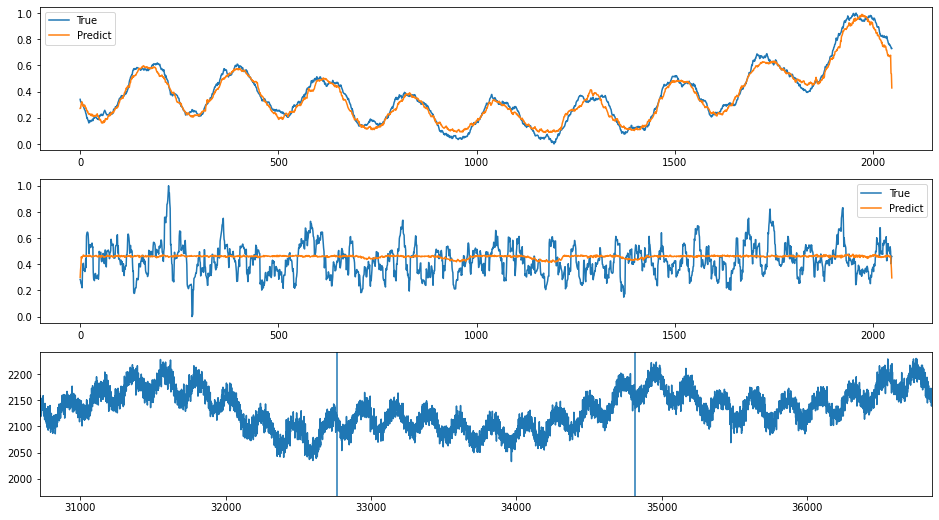

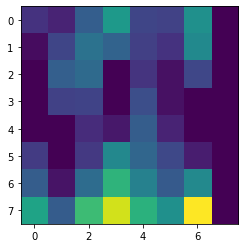

index: 148064
Error: 0.008072126345883123
type                                                         Inst
fill                                                         6346
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-29 10:58:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6346/...
n_bunches                                                     780
bunch_index                                                   412
bunch_number                                                  213
ts_length                                                   65536
chunk                                                           1
Name: 350, dtype: object


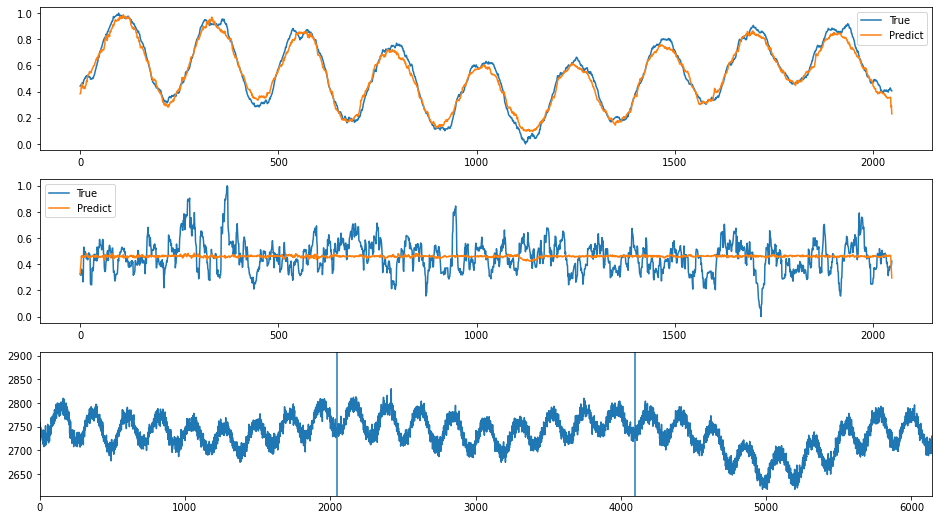

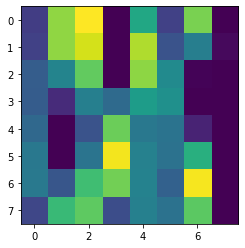

index: 221995
Error: 0.008076390719465157
type                                                         Inst
fill                                                         6965
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-07-23 22:09:09
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6965/...
n_bunches                                                     252
bunch_index                                                   101
bunch_number                                                   52
ts_length                                                   65536
chunk                                                          22
Name: 5764, dtype: object


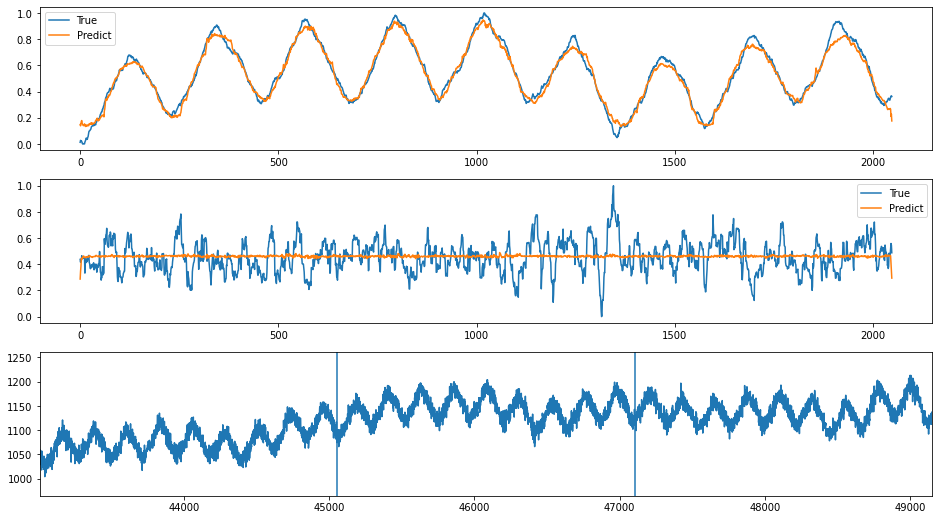

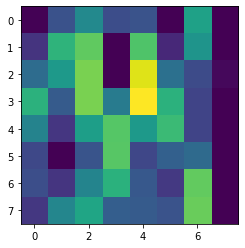

In [25]:
for i in range(10):
    index = sorted_error_indices[i]
    plot_train_index(index)

# From right to left

index: 299200
Error: 0.10874683585863919
type                                                         Inst
fill                                                         6449
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-02 06:43:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6449/...
n_bunches                                                     252
bunch_index                                                  1739
bunch_number                                                  177
ts_length                                                   65536
chunk                                                          17
Name: 4358, dtype: object


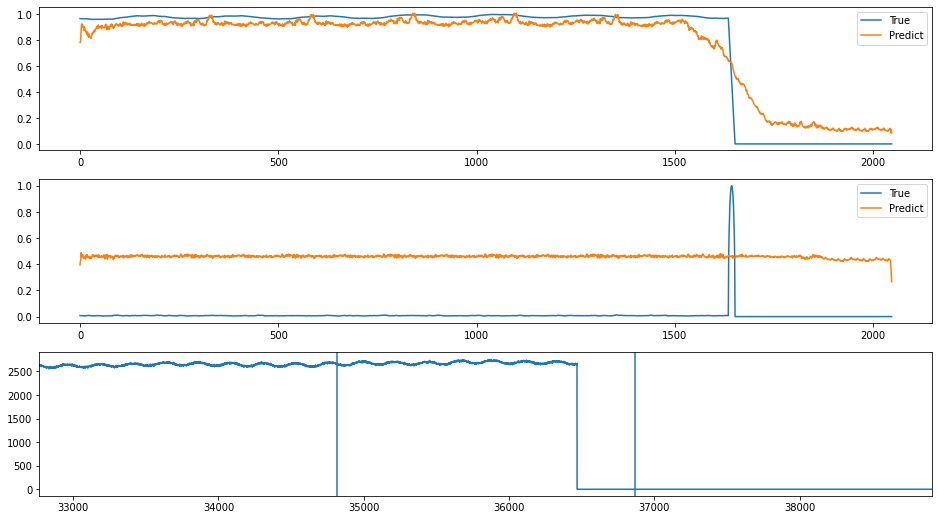

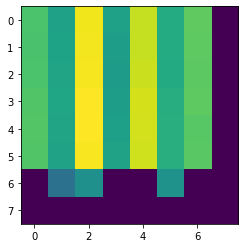

index: 173025
Error: 0.1072095150772412
type                                                         Inst
fill                                                         7414
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-11-06 10:39:21
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7414/...
n_bunches                                                       5
bunch_index                                                  1458
bunch_number                                                    4
ts_length                                                   65536
chunk                                                           4
Name: 1190, dtype: object


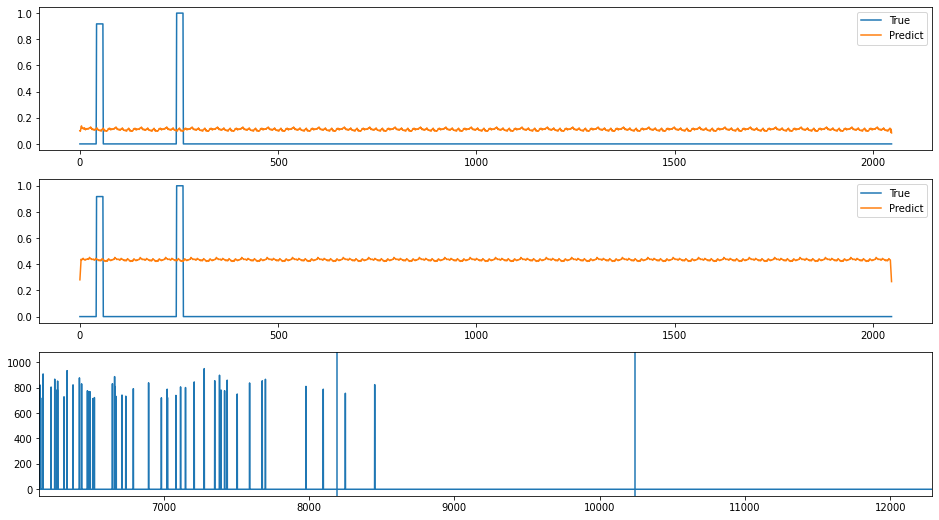

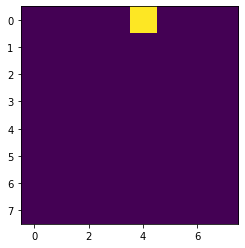

index: 60357
Error: 0.1065904831575224
type                                                         Inst
fill                                                         6572
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-04-17 23:11:08
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6572/...
n_bunches                                                     372
bunch_index                                                   608
bunch_number                                                  363
ts_length                                                   65536
chunk                                                          10
Name: 2597, dtype: object


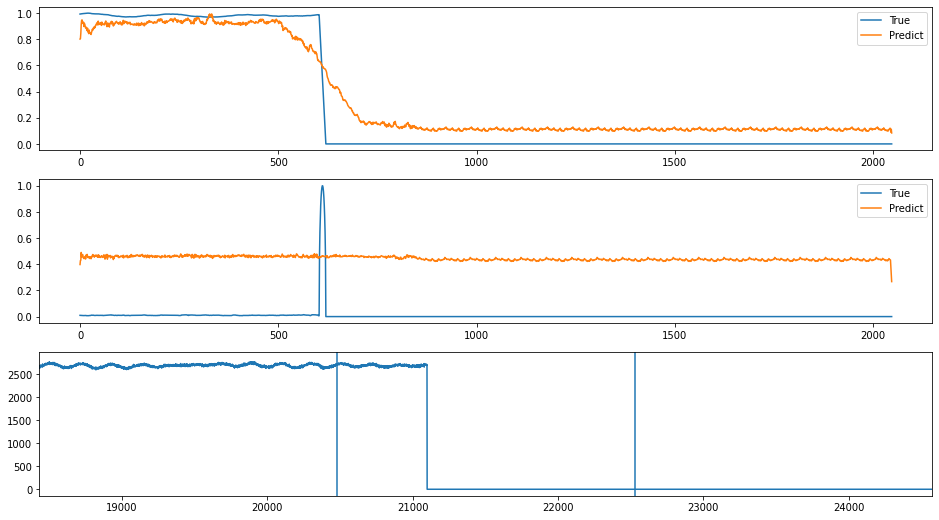

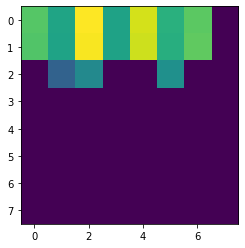

index: 69587
Error: 0.10564103509659808
type                                                         Inst
fill                                                         6611
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-04-25 09:08:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6611/...
n_bunches                                                     315
bunch_index                                                   881
bunch_number                                                   86
ts_length                                                   65536
chunk                                                          10
Name: 2809, dtype: object


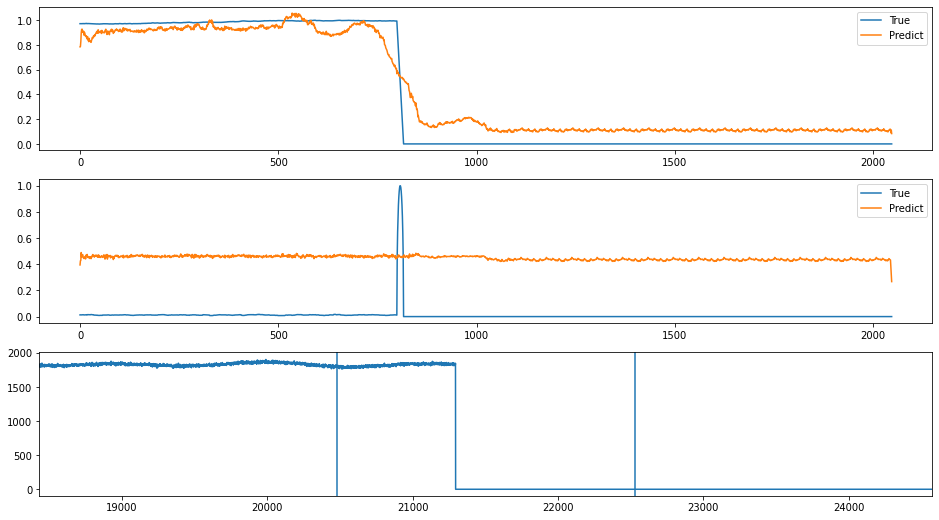

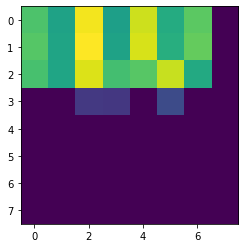

index: 186847
Error: 0.10495269683495892
type                                                         Inst
fill                                                         6278
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-06 23:01:27
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6278/...
n_bunches                                                     652
bunch_index                                                  1131
bunch_number                                                  607
ts_length                                                   65536
chunk                                                           6
Name: 1721, dtype: object


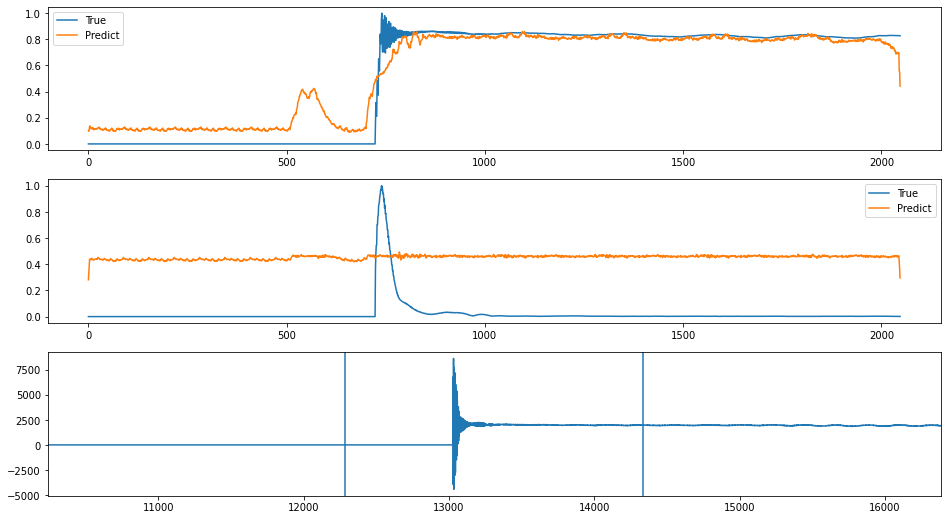

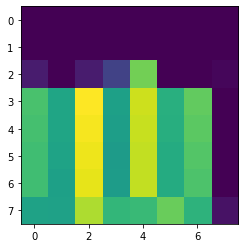

index: 15005
Error: 0.10453623465268214
type                                                         Inst
fill                                                         6278
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-06 23:01:27
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6278/...
n_bunches                                                     652
bunch_index                                                  1093
bunch_number                                                  584
ts_length                                                   65536
chunk                                                           6
Name: 1623, dtype: object


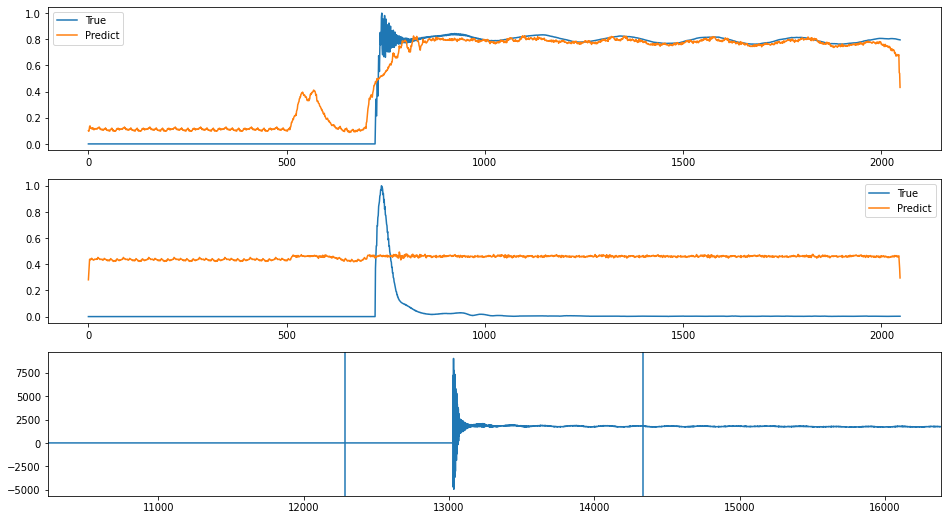

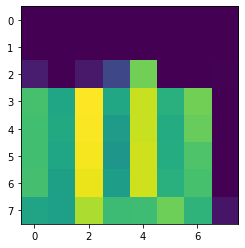

index: 61372
Error: 0.10421773418584244
type                                                         Inst
fill                                                         7379
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-29 00:52:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7379/...
n_bunches                                                     156
bunch_index                                                   928
bunch_number                                                   40
ts_length                                                   65536
chunk                                                          30
Name: 7822, dtype: object


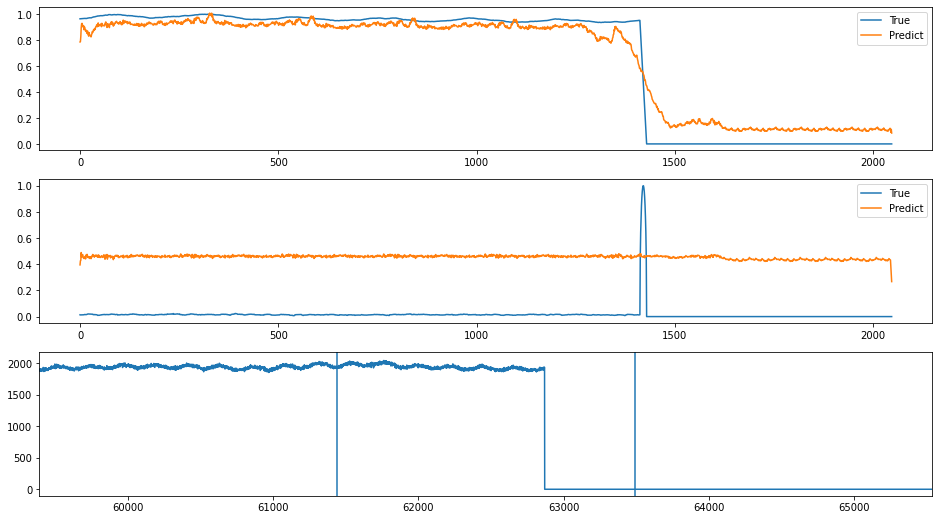

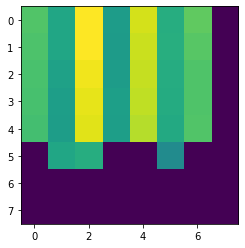

index: 260039
Error: 0.10411795565477633
type                                                         Inst
fill                                                         7328
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-21 21:52:31
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7328/...
n_bunches                                                     108
bunch_index                                                    91
bunch_number                                                   42
ts_length                                                   65536
chunk                                                          12
Name: 3171, dtype: object


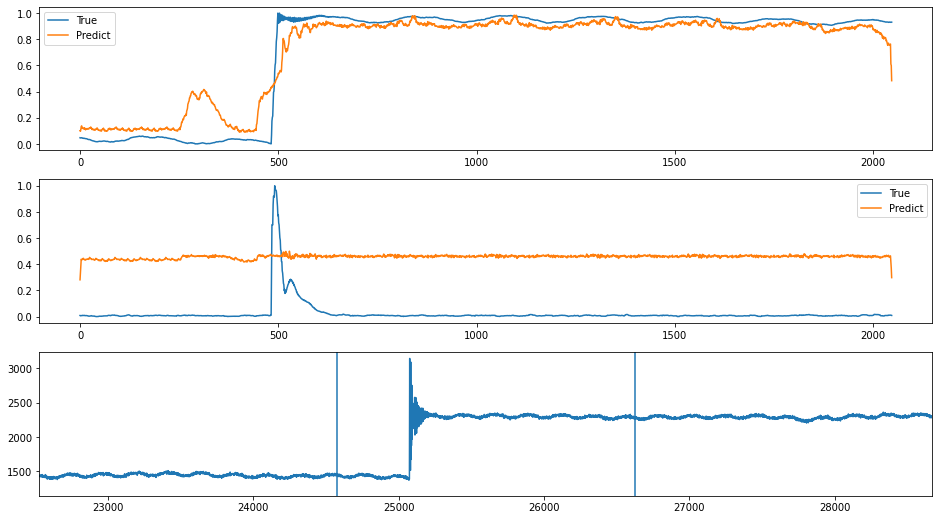

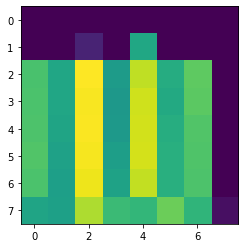

index: 26612
Error: 0.10401942896699978
type                                                         Inst
fill                                                         6880
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-07-03 02:40:15
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6880/...
n_bunches                                                     734
bunch_index                                                  3030
bunch_number                                                  645
ts_length                                                   65536
chunk                                                           7
Name: 1969, dtype: object


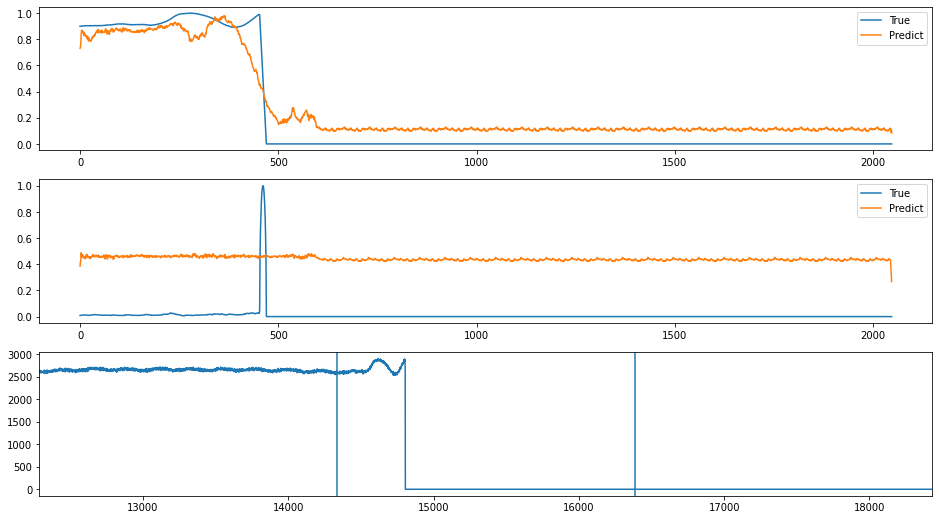

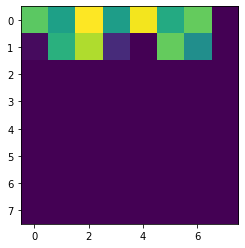

index: 268538
Error: 0.1039542699565685
type                                                         Inst
fill                                                         6880
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-07-03 02:40:15
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6880/...
n_bunches                                                     734
bunch_index                                                   286
bunch_number                                                   41
ts_length                                                   65536
chunk                                                           7
Name: 1849, dtype: object


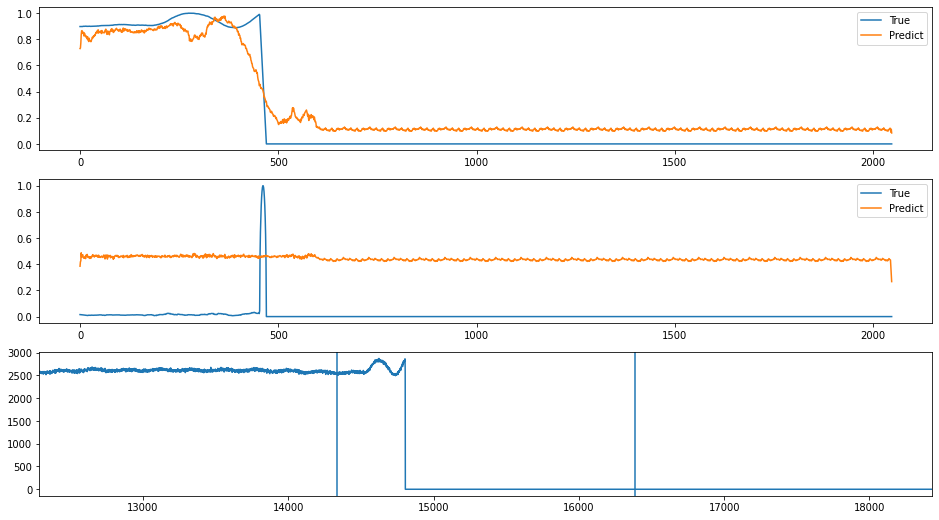

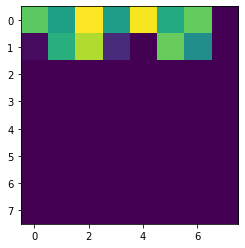

index: 337419
Error: 0.1037218044532576
type                                                         Inst
fill                                                         6192
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-09-12 17:15:33
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6192/...
n_bunches                                                     460
bunch_index                                                   774
bunch_number                                                  416
ts_length                                                   65536
chunk                                                           7
Name: 1886, dtype: object


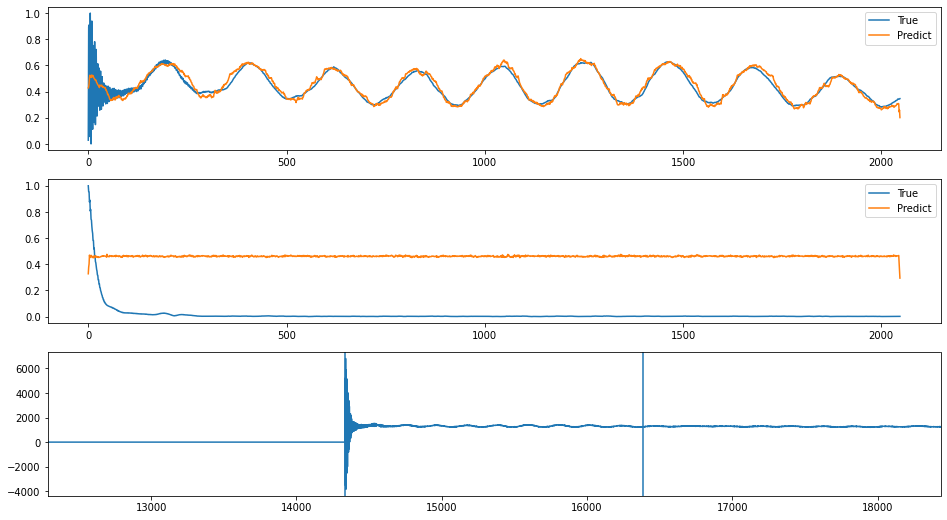

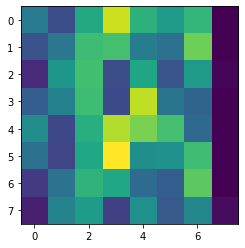

index: 136865
Error: 0.10365722488640086
type                                                         Inst
fill                                                         6348
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-30 20:14:26
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6348/...
n_bunches                                                    1132
bunch_index                                                  1974
bunch_number                                                 1055
ts_length                                                   65536
chunk                                                           1
Name: 452, dtype: object


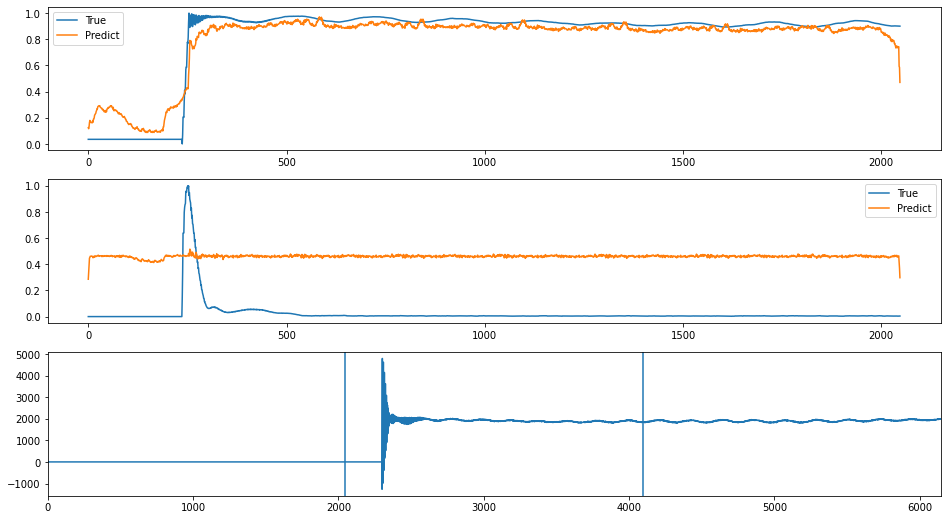

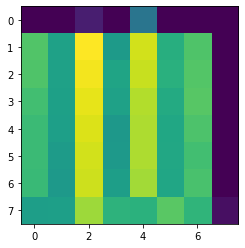

index: 184880
Error: 0.10356937390194774
type                                                         Inst
fill                                                         6220
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-09-17 21:11:38
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6220/...
n_bunches                                                     108
bunch_index                                                  1398
bunch_number                                                   97
ts_length                                                   65536
chunk                                                           4
Name: 1138, dtype: object


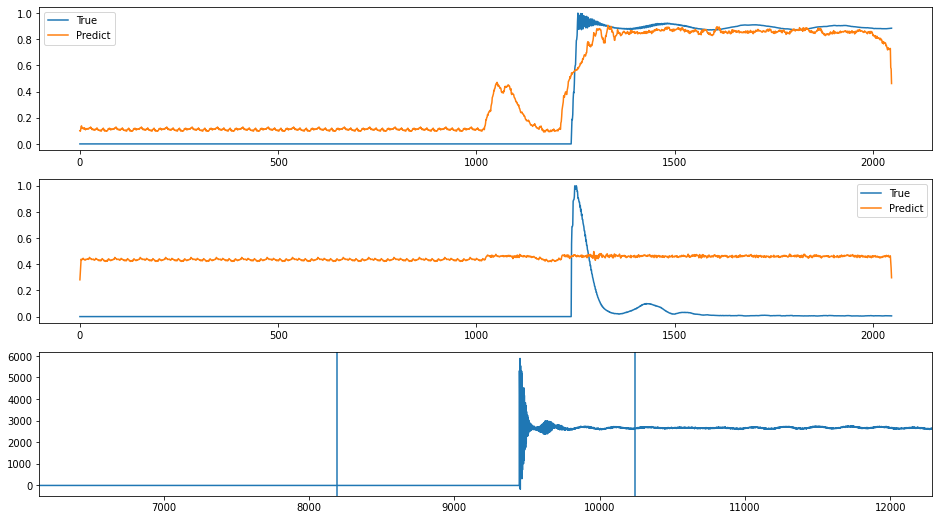

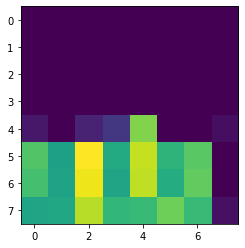

index: 391290
Error: 0.10352838749832723
type                                                         Inst
fill                                                         7056
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-08-15 03:00:16
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7056/...
n_bunches                                                     540
bunch_index                                                   687
bunch_number                                                  496
ts_length                                                   65536
chunk                                                          29
Name: 7659, dtype: object


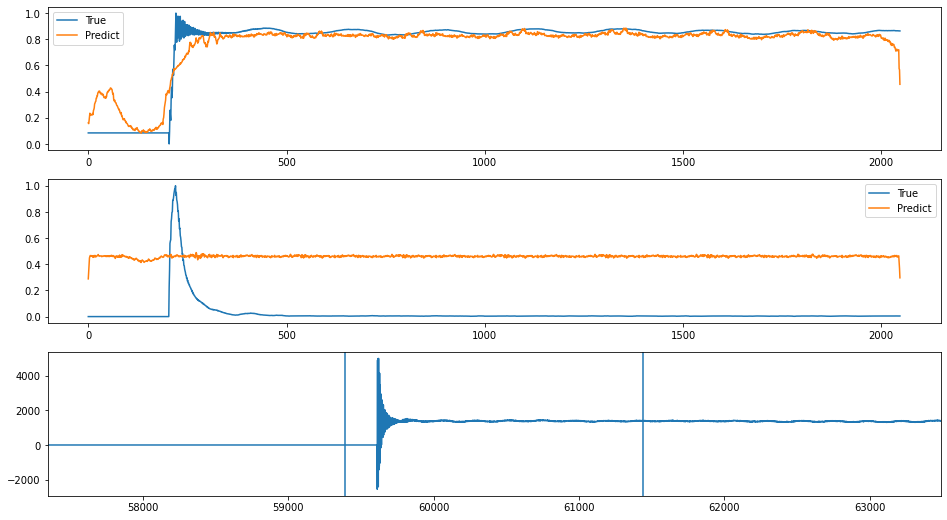

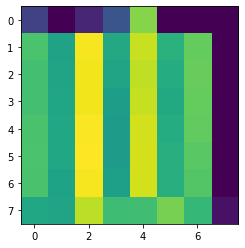

index: 247325
Error: 0.10334318221448979
type                                                         Inst
fill                                                         7061
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-08-17 22:10:41
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7061/...
n_bunches                                                     636
bunch_index                                                   612
bunch_number                                                  435
ts_length                                                   65536
chunk                                                          11
Name: 3023, dtype: object


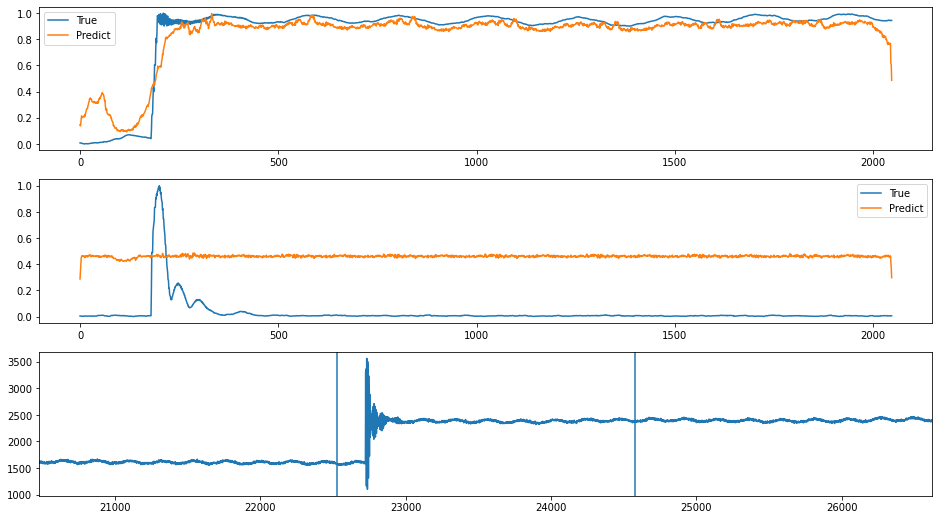

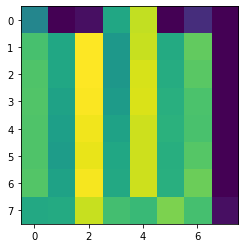

index: 132229
Error: 0.10322657127733001
type                                                         Inst
fill                                                         6970
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-07-24 09:32:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6970/...
n_bunches                                                     108
bunch_index                                                   144
bunch_number                                                   88
ts_length                                                   65536
chunk                                                          25
Name: 6566, dtype: object


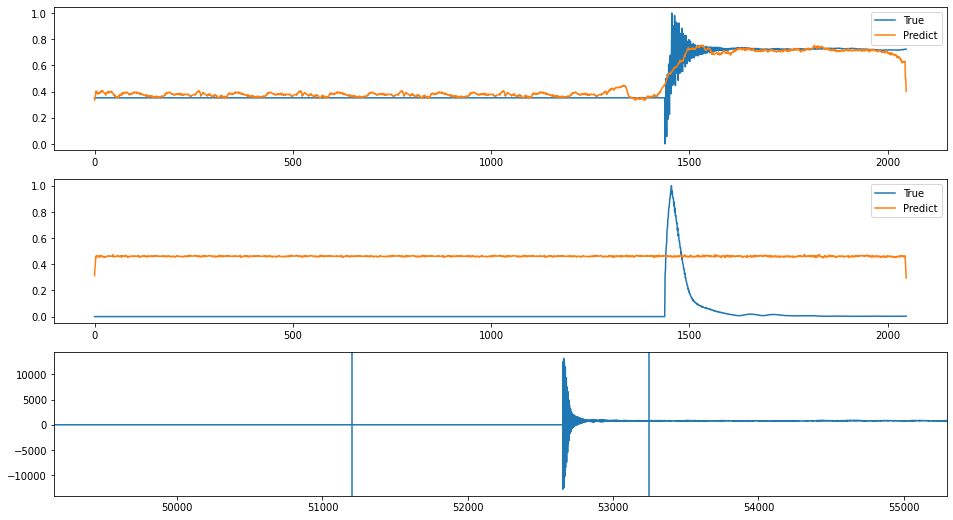

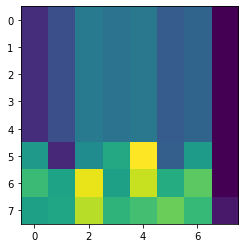

index: 267575
Error: 0.10311073620229656
type                                                         Inst
fill                                                         6279
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-07 08:15:25
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6279/...
n_bunches                                                     428
bunch_index                                                   619
bunch_number                                                  331
ts_length                                                   65536
chunk                                                           6
Name: 1597, dtype: object


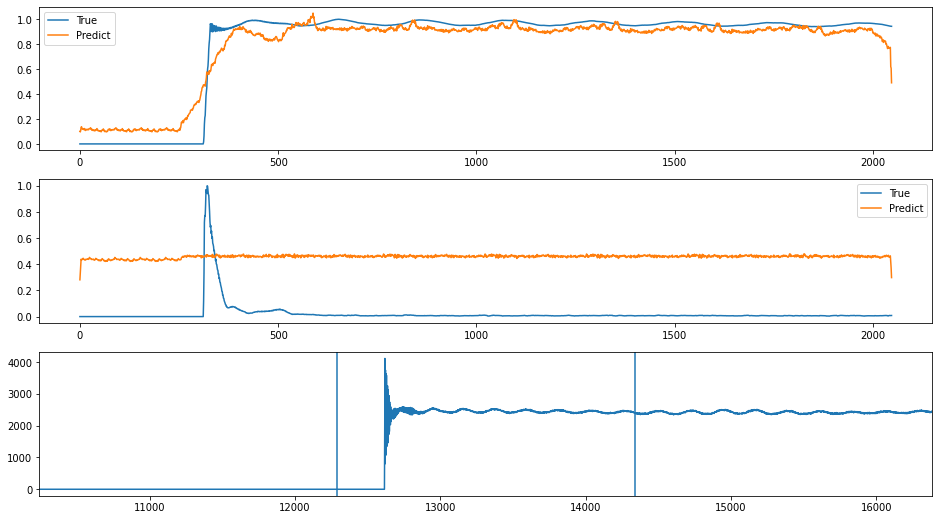

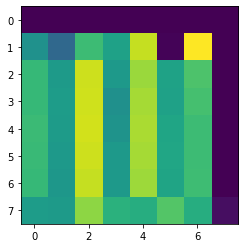

index: 6552
Error: 0.1028972958663589
type                                                         Inst
fill                                                         6279
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-07 08:11:20
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6279/...
n_bunches                                                     172
bunch_index                                                   235
bunch_number                                                  117
ts_length                                                   65536
chunk                                                           6
Name: 1694, dtype: object


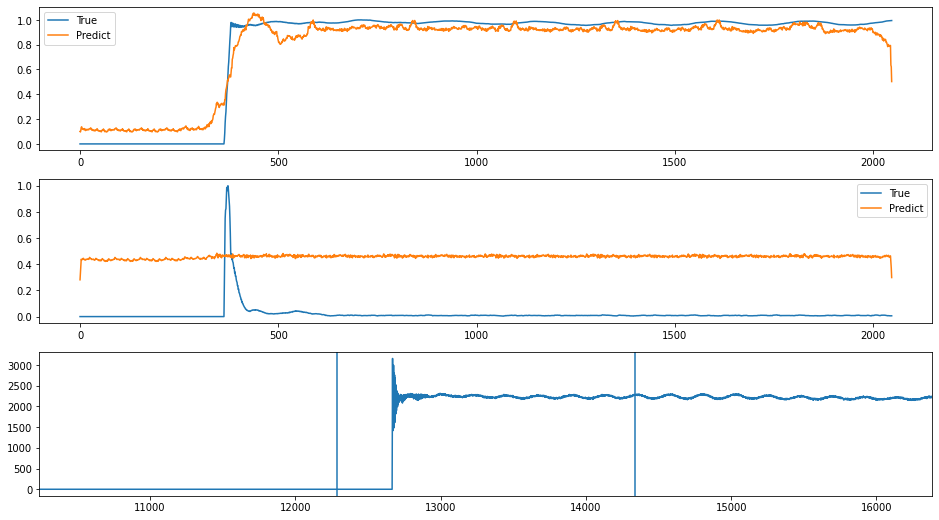

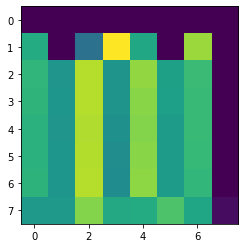

index: 9965
Error: 0.10288956144625752
type                                                         Inst
fill                                                         6970
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-07-24 09:32:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6970/...
n_bunches                                                     108
bunch_index                                                   155
bunch_number                                                   99
ts_length                                                   65536
chunk                                                          25
Name: 6545, dtype: object


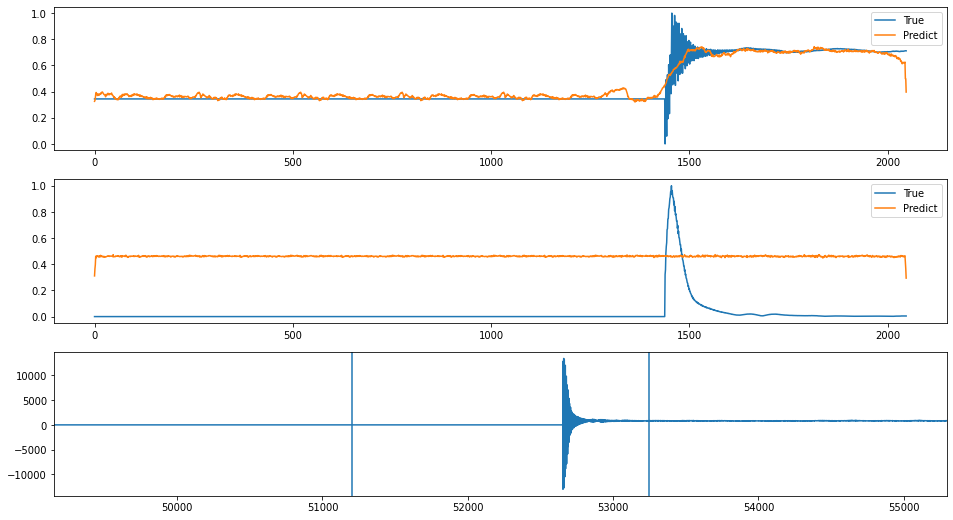

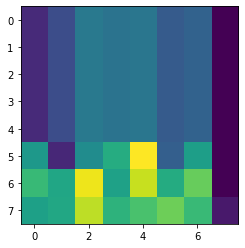

index: 181386
Error: 0.10278167076709266
type                                                         Inst
fill                                                         6362
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-04 17:28:46
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6362/...
n_bunches                                                     172
bunch_index                                                   133
bunch_number                                                   53
ts_length                                                   65536
chunk                                                           2
Name: 649, dtype: object


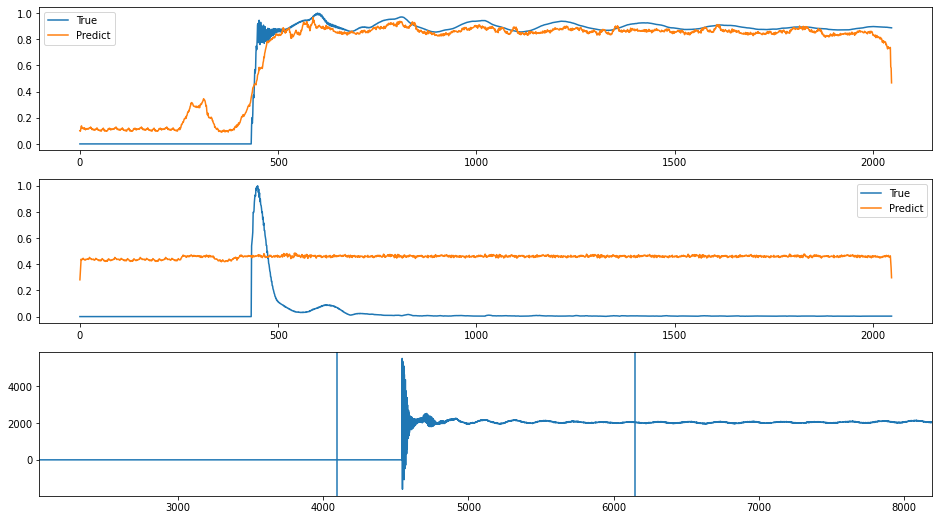

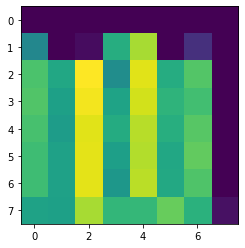

index: 382891
Error: 0.10274444520612994
type                                                         Inst
fill                                                         6381
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-12 07:49:48
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6381/...
n_bunches                                                     268
bunch_index                                                  1449
bunch_number                                                  208
ts_length                                                   65536
chunk                                                           5
Name: 1407, dtype: object


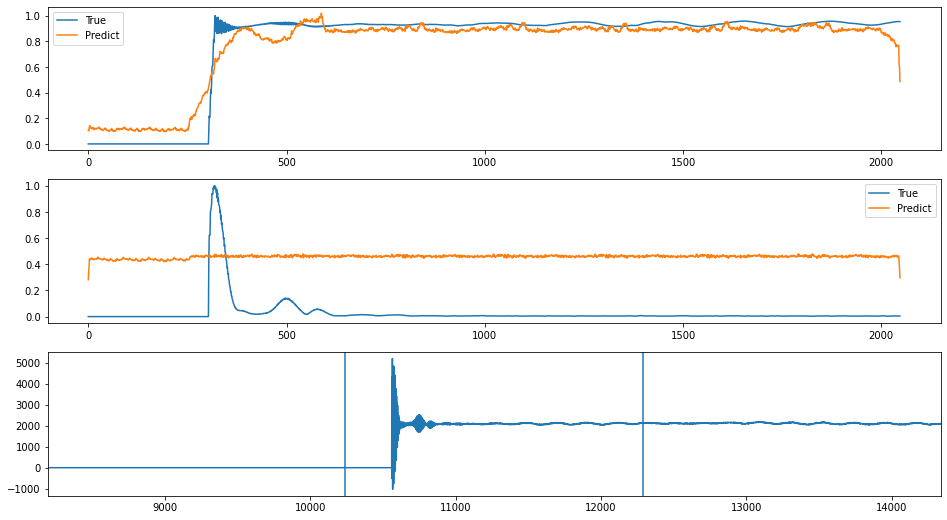

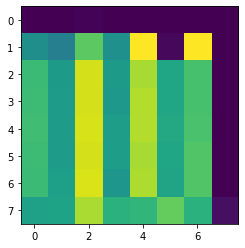

index: 370360
Error: 0.10267556457085117
type                                                         Inst
fill                                                         6957
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-07-21 22:29:49
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6957/...
n_bunches                                                     636
bunch_index                                                   647
bunch_number                                                  463
ts_length                                                   65536
chunk                                                          12
Name: 3313, dtype: object


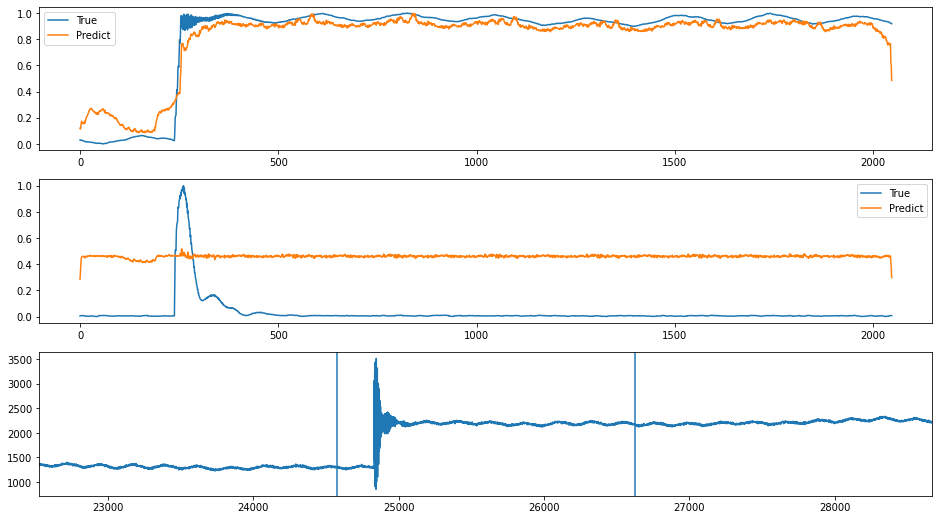

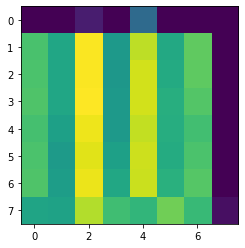

index: 142546
Error: 0.10264580429207279
type                                                         Inst
fill                                                         6273
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-05 17:17:48
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6273/...
n_bunches                                                      44
bunch_index                                                    50
bunch_number                                                   17
ts_length                                                   65536
chunk                                                           4
Name: 1073, dtype: object


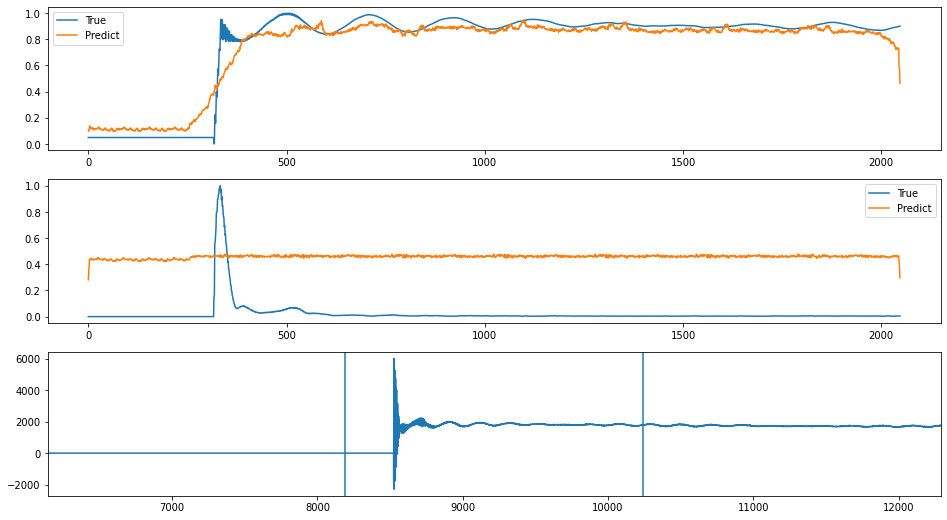

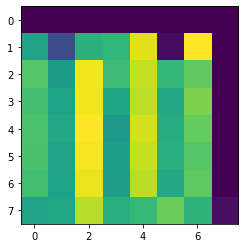

index: 299789
Error: 0.10240443680532502
type                                                         Inst
fill                                                         6192
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-09-12 17:15:33
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6192/...
n_bunches                                                     460
bunch_index                                                   808
bunch_number                                                  438
ts_length                                                   65536
chunk                                                           7
Name: 1864, dtype: object


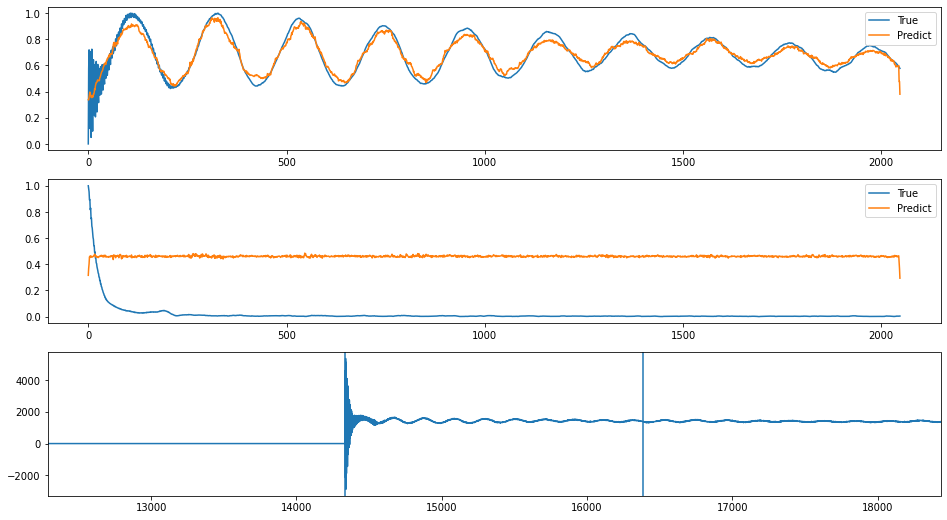

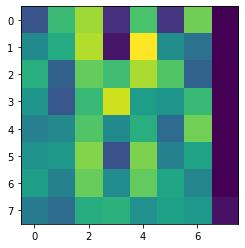

index: 14258
Error: 0.10234308945346386
type                                                         Inst
fill                                                         6706
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-05-20 08:58:43
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6706/...
n_bunches                                                     602
bunch_index                                                  2020
bunch_number                                                  555
ts_length                                                   65536
chunk                                                          12
Name: 3093, dtype: object


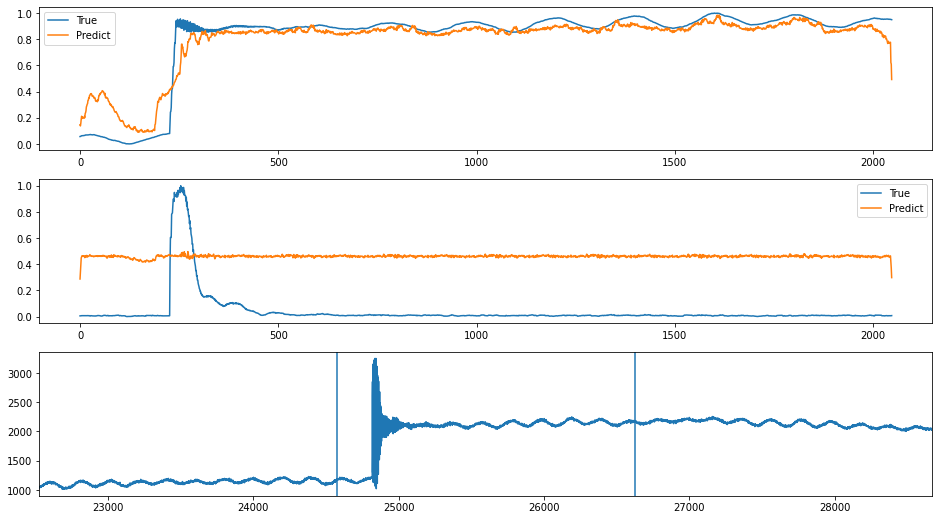

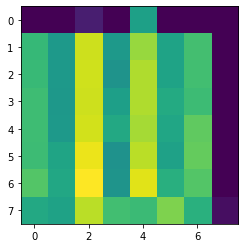

index: 28741
Error: 0.10233254438195596
type                                                         Inst
fill                                                         6749
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-06-01 03:53:35
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6749/...
n_bunches                                                     780
bunch_index                                                   939
bunch_number                                                  656
ts_length                                                   65536
chunk                                                          11
Name: 2920, dtype: object


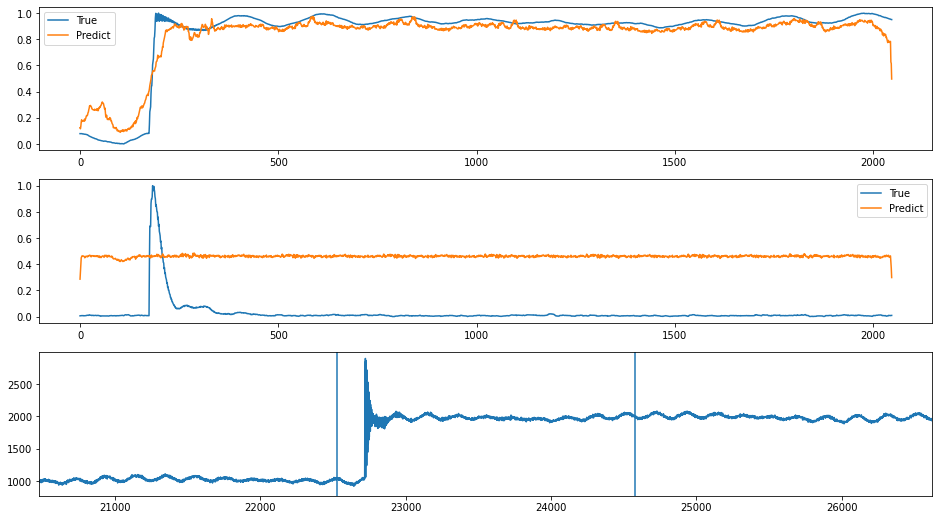

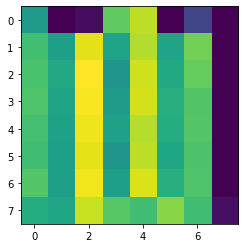

index: 251318
Error: 0.10231410440688854
type                                                         Inst
fill                                                         6246
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-09-27 04:43:00
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6246/...
n_bunches                                                     292
bunch_index                                                   513
bunch_number                                                  283
ts_length                                                   65536
chunk                                                           4
Name: 1175, dtype: object


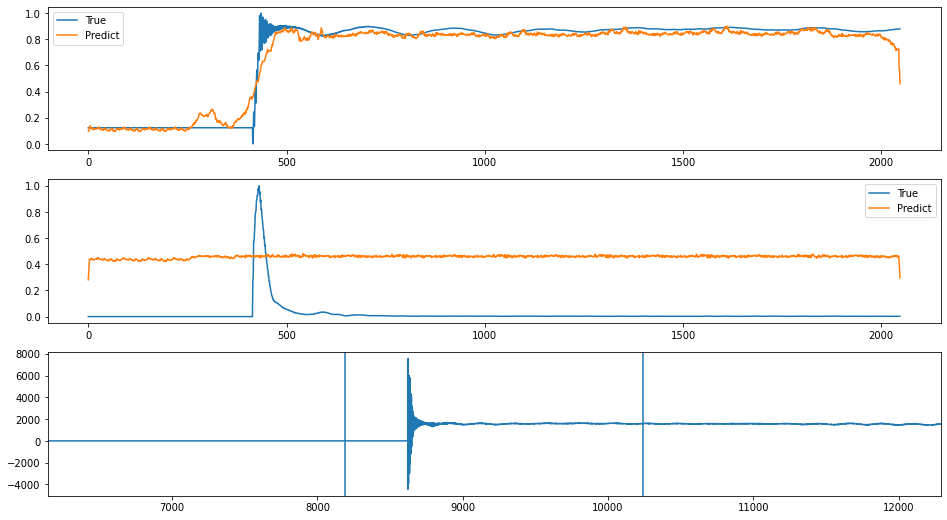

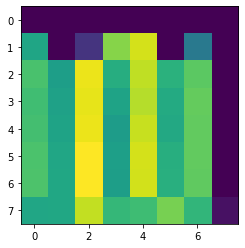

index: 234807
Error: 0.10230525027390679
type                                                         Inst
fill                                                         7356
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-25 23:07:22
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7356/...
n_bunches                                                     300
bunch_index                                                   622
bunch_number                                                  285
ts_length                                                   65536
chunk                                                          10
Name: 2631, dtype: object


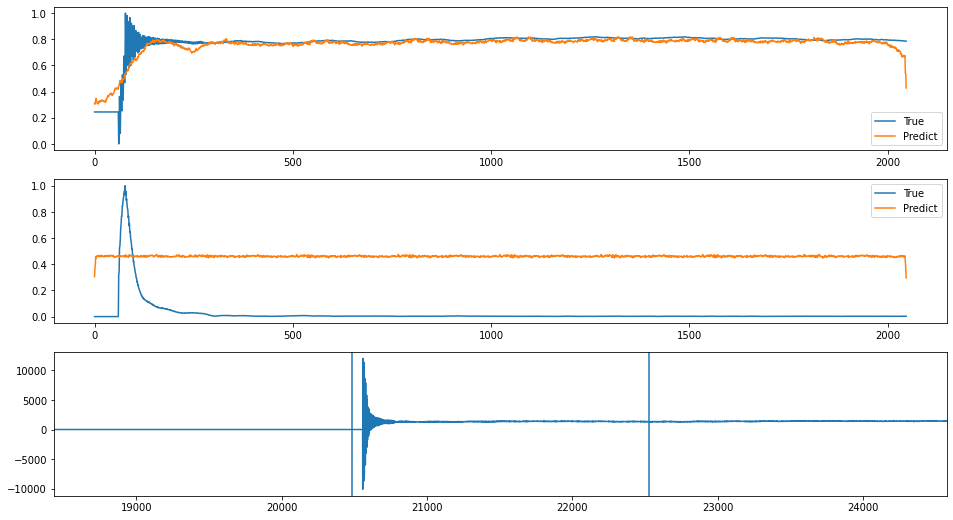

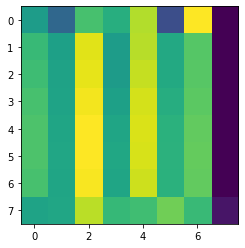

index: 186036
Error: 0.1022812115253173
type                                                         Inst
fill                                                         7333
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-22 22:13:15
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7333/...
n_bunches                                                     780
bunch_index                                                   613
bunch_number                                                  436
ts_length                                                   65536
chunk                                                           2
Name: 558, dtype: object


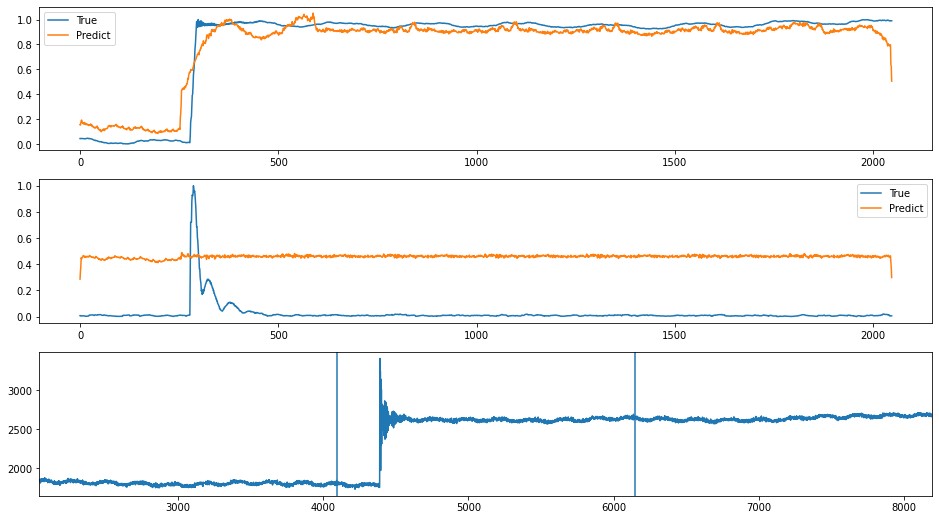

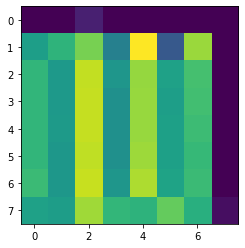

index: 37037
Error: 0.10226361603898397
type                                                         Inst
fill                                                         7333
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-22 22:15:05
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7333/...
n_bunches                                                     924
bunch_index                                                  1104
bunch_number                                                  795
ts_length                                                   65536
chunk                                                          11
Name: 2960, dtype: object


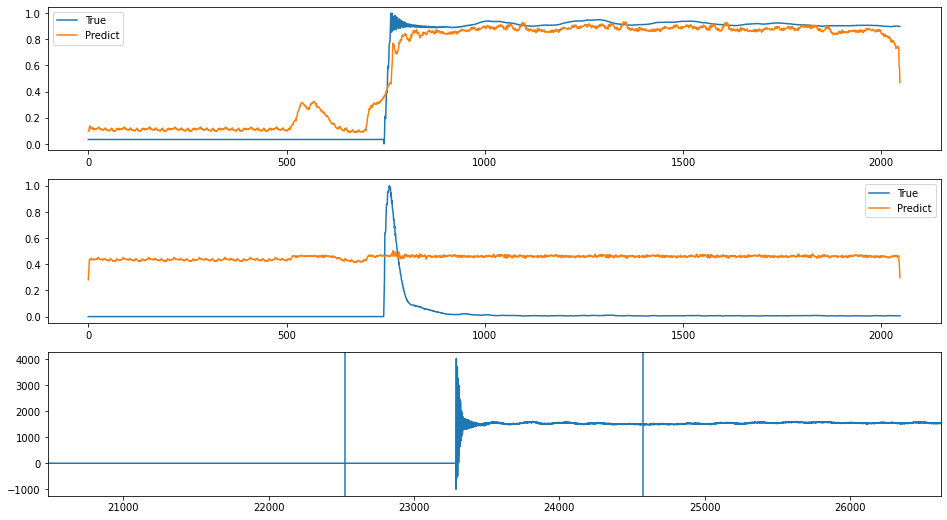

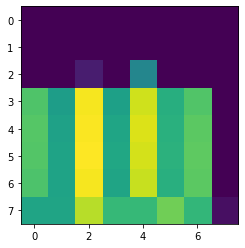

index: 106101
Error: 0.10220339597699987
type                                                         Inst
fill                                                         6344
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-28 21:13:22
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6344/...
n_bunches                                                     428
bunch_index                                                   590
bunch_number                                                  310
ts_length                                                   65536
chunk                                                           3
Name: 890, dtype: object


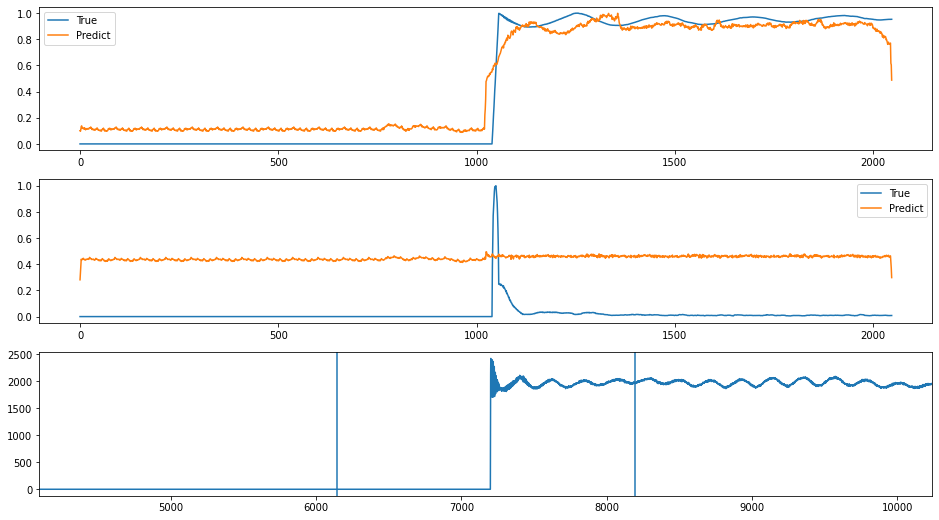

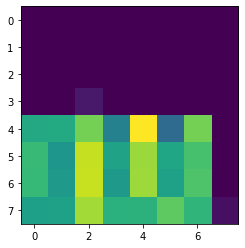

index: 61999
Error: 0.10219062865712442
type                                                         Inst
fill                                                         7133
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-09-07 12:08:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7133/...
n_bunches                                                     924
bunch_index                                                  1128
bunch_number                                                  819
ts_length                                                   65536
chunk                                                          26
Name: 6818, dtype: object


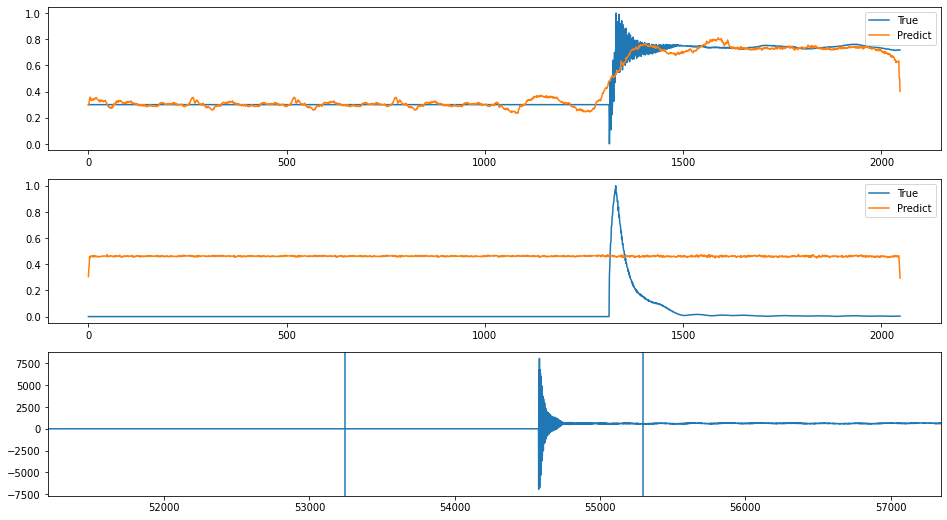

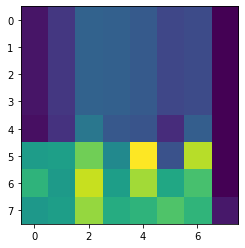

index: 173709
Error: 0.10212501940606569
type                                                         Inst
fill                                                         6344
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-28 21:20:43
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6344/...
n_bunches                                                     908
bunch_index                                                  1653
bunch_number                                                  906
ts_length                                                   65536
chunk                                                           6
Name: 1683, dtype: object


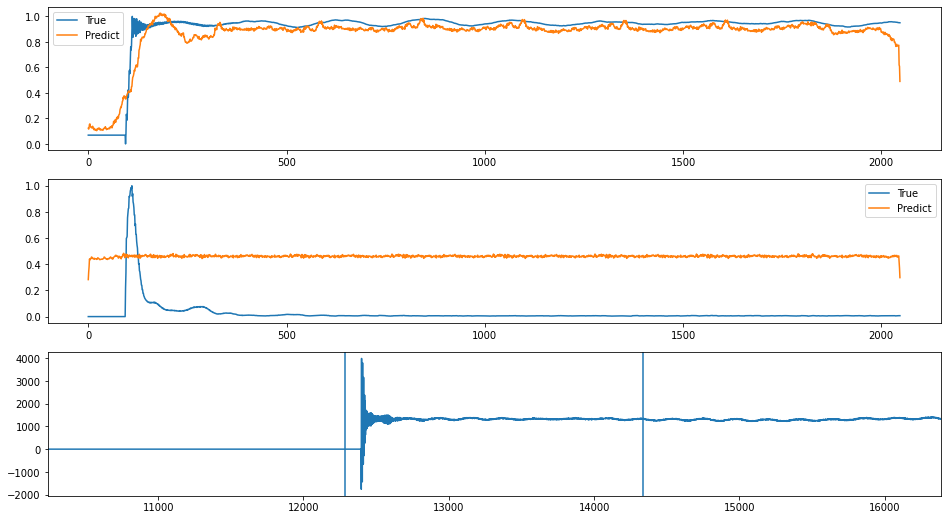

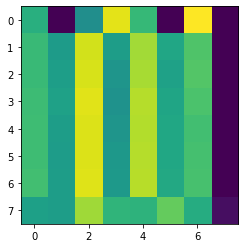

index: 210565
Error: 0.10207557954522387
type                                                         Inst
fill                                                         7306
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-15 06:24:30
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7306/...
n_bunches                                                     217
bunch_index                                                  1172
bunch_number                                                  191
ts_length                                                   65536
chunk                                                          11
Name: 3071, dtype: object


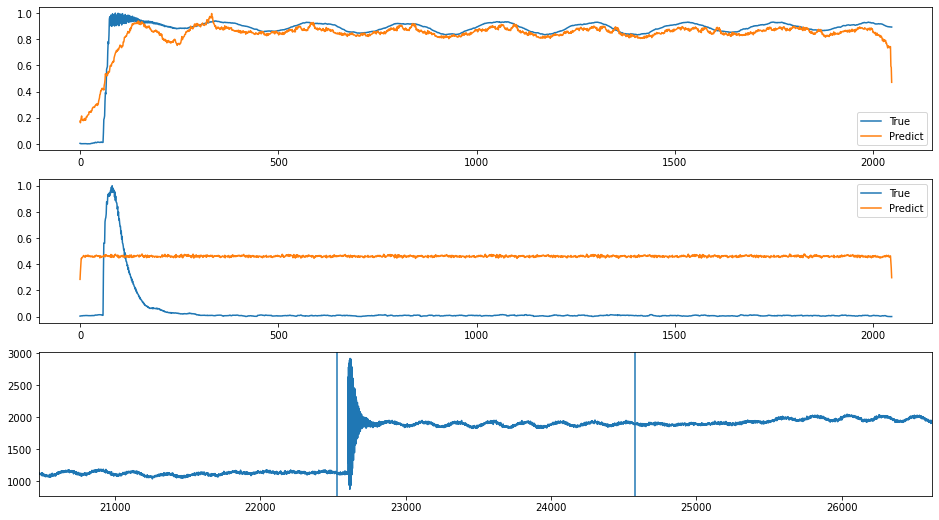

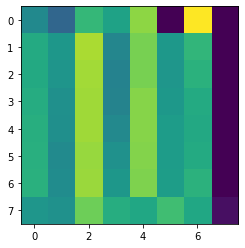

index: 339246
Error: 0.10207380079595602
type                                                         Inst
fill                                                         6274
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-05 18:47:33
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6274/...
n_bunches                                                     428
bunch_index                                                   684
bunch_number                                                  370
ts_length                                                   65536
chunk                                                           6
Name: 1761, dtype: object


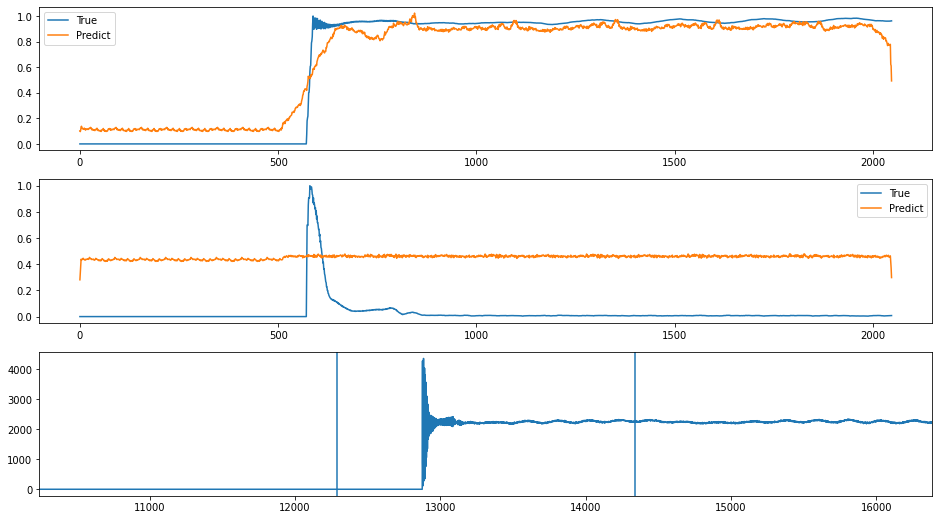

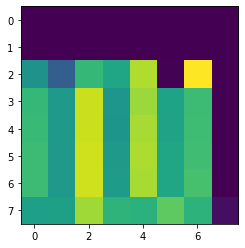

index: 12394
Error: 0.10205326925416101
type                                                         Inst
fill                                                         6340
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-27 21:26:38
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6340/...
n_bunches                                                     300
bunch_index                                                   481
bunch_number                                                  259
ts_length                                                   65536
chunk                                                           6
Name: 1585, dtype: object


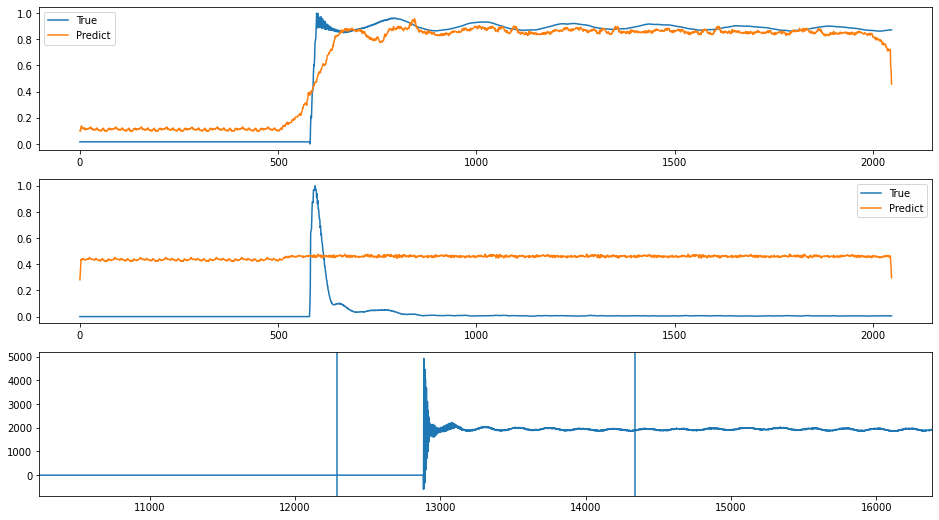

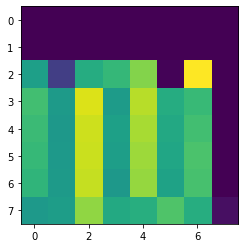

index: 289109
Error: 0.10194861772662486
type                                                         Inst
fill                                                         7077
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-08-23 13:35:13
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7077/...
n_bunches                                                     300
bunch_index                                                  1028
bunch_number                                                  221
ts_length                                                   65536
chunk                                                          30
Name: 7780, dtype: object


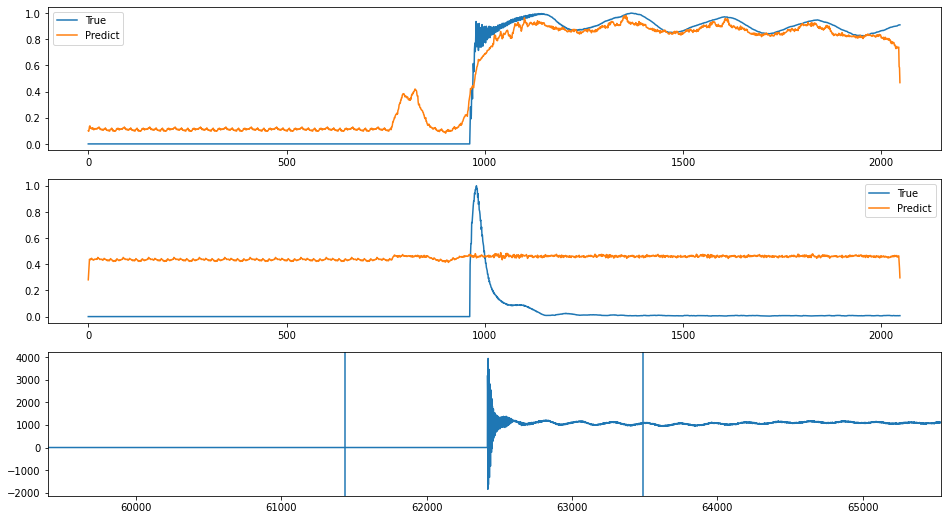

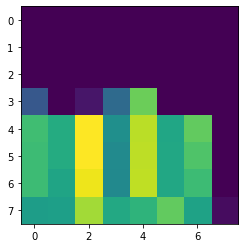

index: 125193
Error: 0.10193881050582326
type                                                         Inst
fill                                                         6692
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-05-16 17:57:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6692/...
n_bunches                                                    1022
bunch_index                                                   220
bunch_number                                                  106
ts_length                                                   65536
chunk                                                          14
Name: 3767, dtype: object


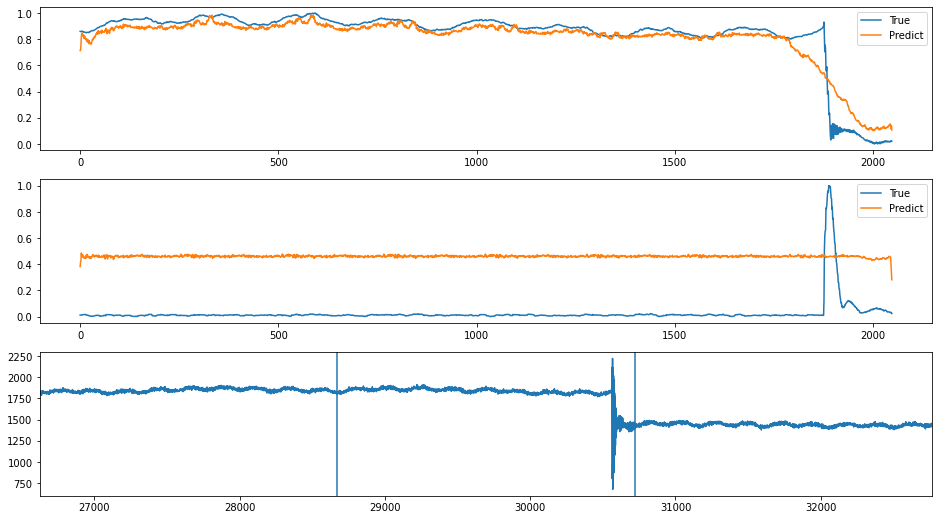

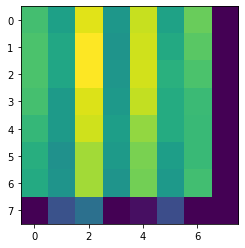

index: 315274
Error: 0.10192538046353904
type                                                         Inst
fill                                                         6898
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-07-08 00:50:36
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6898/...
n_bunches                                                     444
bunch_index                                                   585
bunch_number                                                  426
ts_length                                                   65536
chunk                                                          11
Name: 2939, dtype: object


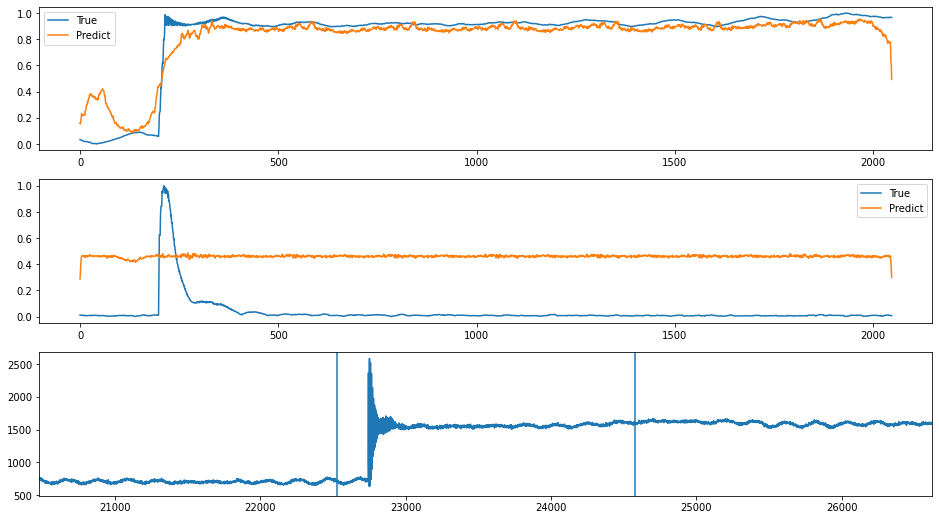

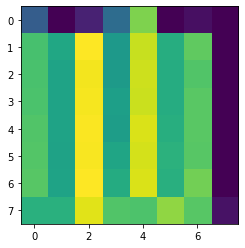

index: 339795
Error: 0.10189186498393978
type                                                         Inst
fill                                                         6192
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-09-12 17:15:33
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6192/...
n_bunches                                                     460
bunch_index                                                   774
bunch_number                                                  416
ts_length                                                   65536
chunk                                                           6
Name: 1630, dtype: object


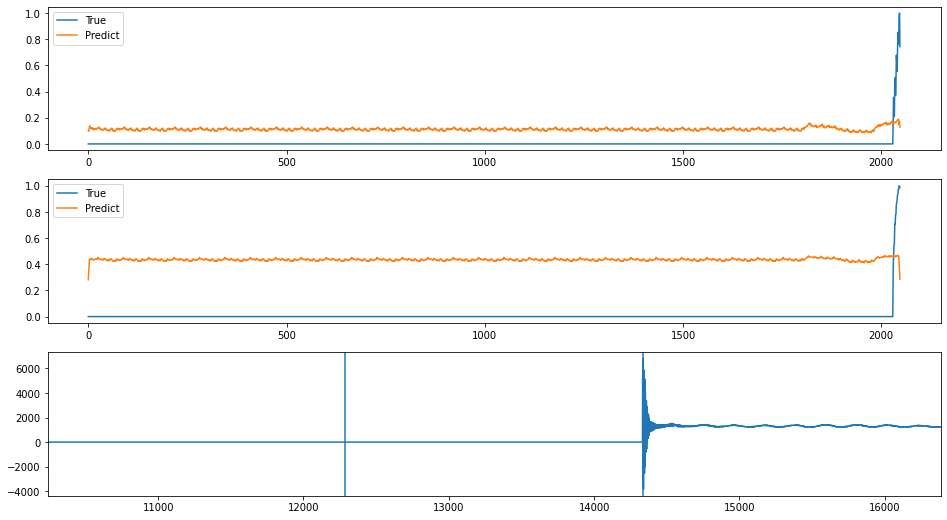

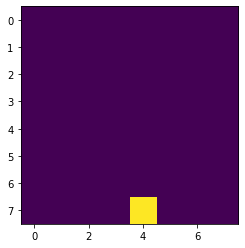

index: 281128
Error: 0.10188013599368165
type                                                         Inst
fill                                                         6274
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-05 19:04:33
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6274/...
n_bunches                                                     908
bunch_index                                                  1653
bunch_number                                                  906
ts_length                                                   65536
chunk                                                           6
Name: 1718, dtype: object


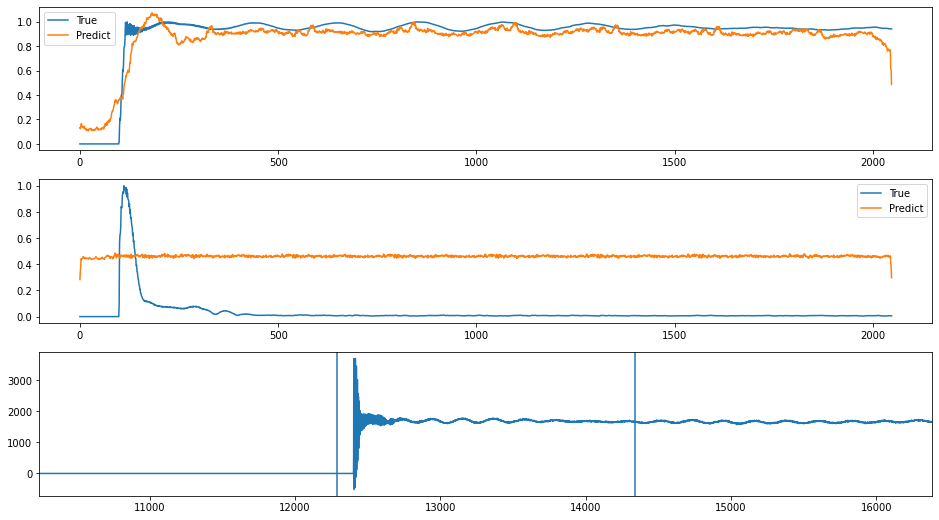

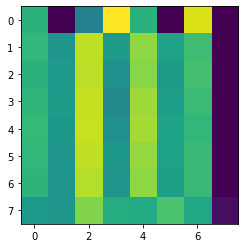

index: 298967
Error: 0.1018724615570347
type                                                         Inst
fill                                                         6192
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-09-12 17:15:33
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6192/...
n_bunches                                                     460
bunch_index                                                   808
bunch_number                                                  438
ts_length                                                   65536
chunk                                                           6
Name: 1608, dtype: object


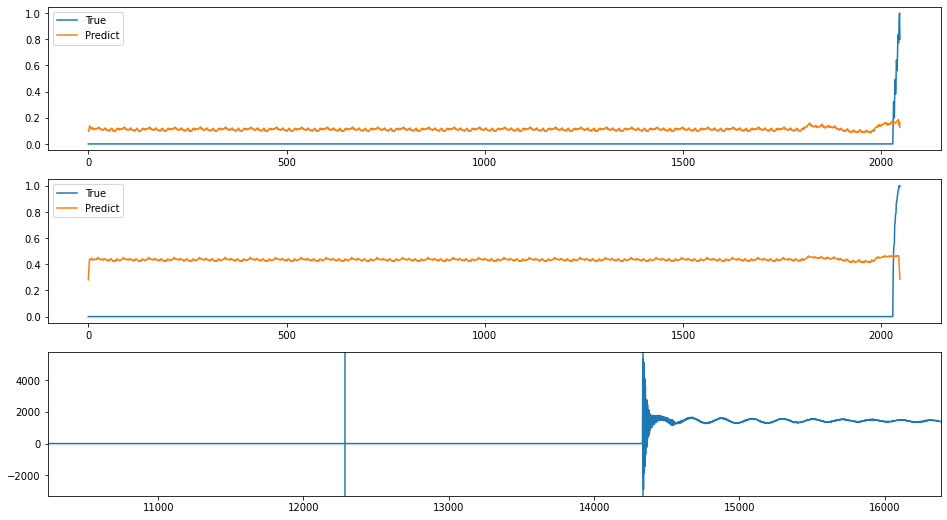

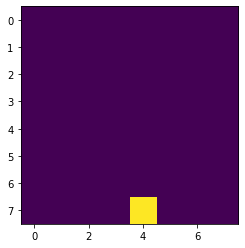

index: 331314
Error: 0.10181083622410833
type                                                         Inst
fill                                                         7334
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-23 15:11:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7334/...
n_bunches                                                     780
bunch_index                                                  1045
bunch_number                                                  767
ts_length                                                   65536
chunk                                                          11
Name: 2974, dtype: object


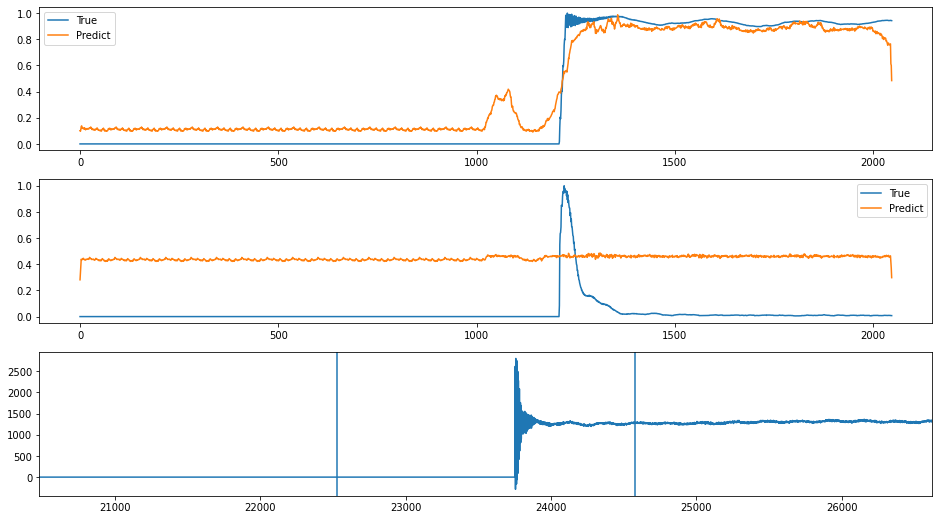

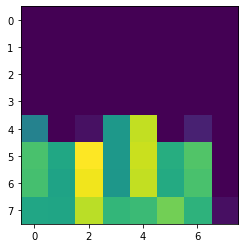

index: 204047
Error: 0.10173270096461576
type                                                         Inst
fill                                                         7242
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-01 08:21:49
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7242/...
n_bunches                                                     108
bunch_index                                                   130
bunch_number                                                   74
ts_length                                                   65536
chunk                                                          11
Name: 3019, dtype: object


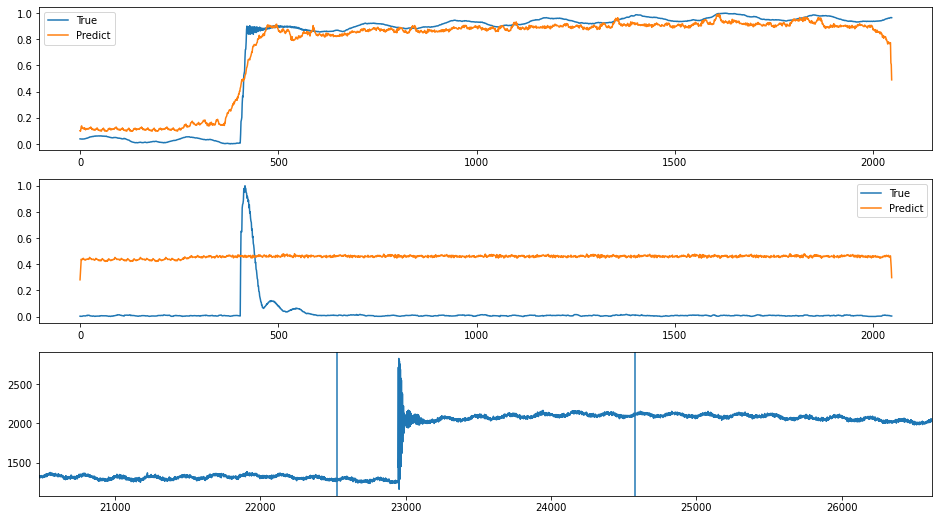

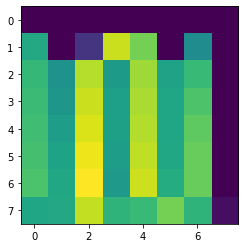

index: 2052
Error: 0.10164530469590578
type                                                         Inst
fill                                                         7347
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-25 10:18:28
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7347/...
n_bunches                                                     540
bunch_index                                                   654
bunch_number                                                  470
ts_length                                                   65536
chunk                                                          10
Name: 2768, dtype: object


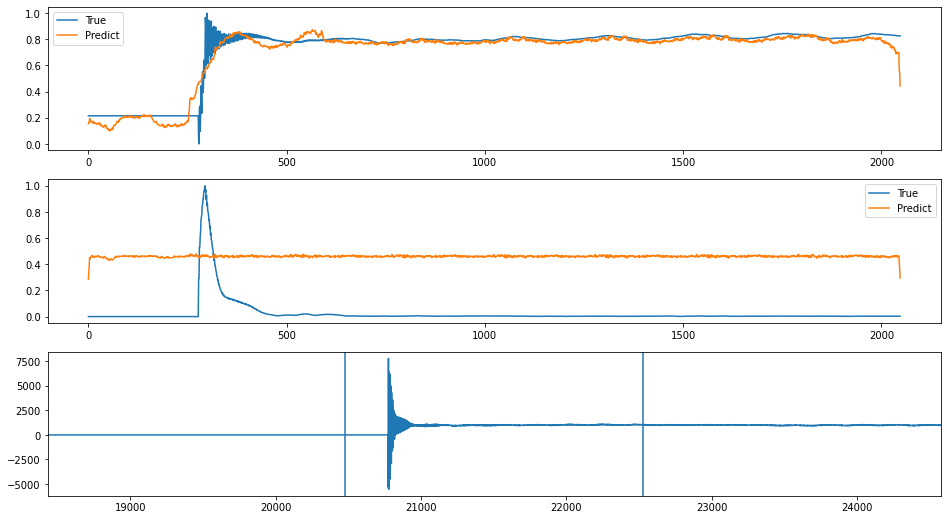

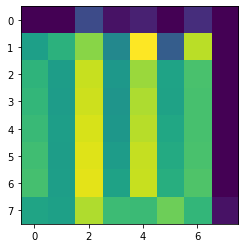

index: 264552
Error: 0.10159949066203894
type                                                         Inst
fill                                                         6247
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-09-27 07:38:22
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6247/...
n_bunches                                                     572
bunch_index                                                   983
bunch_number                                                  535
ts_length                                                   65536
chunk                                                           3
Name: 921, dtype: object


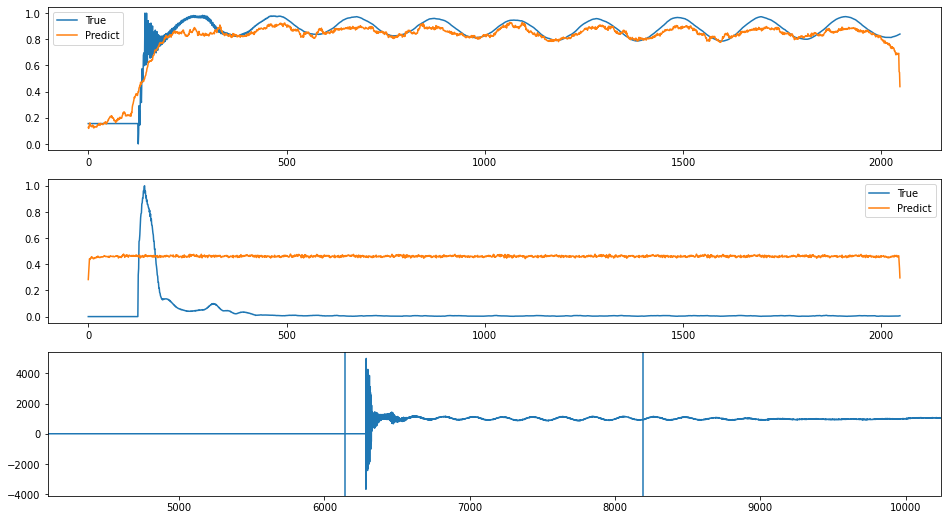

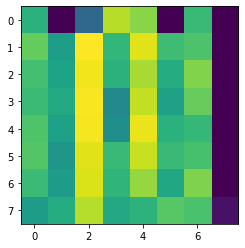

index: 8110
Error: 0.10153799719142004
type                                                         Inst
fill                                                         6266
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-02 18:22:21
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6266/...
n_bunches                                                     396
bunch_index                                                   636
bunch_number                                                  331
ts_length                                                   65536
chunk                                                           3
Name: 937, dtype: object


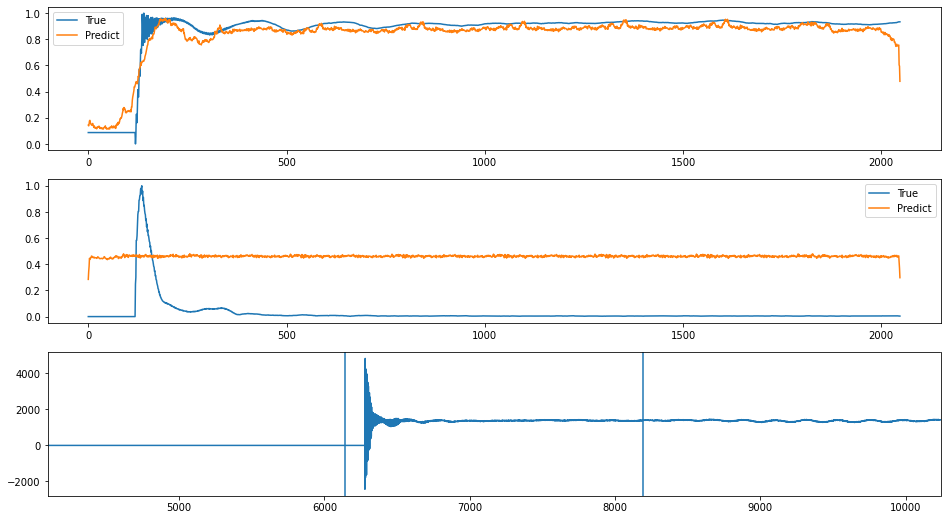

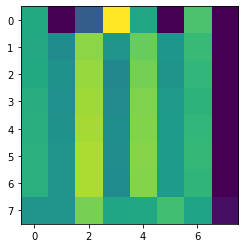

index: 384150
Error: 0.10150809389272161
type                                                         Inst
fill                                                         6192
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-09-12 17:13:31
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6192/...
n_bunches                                                     292
bunch_index                                                   459
bunch_number                                                  245
ts_length                                                   65536
chunk                                                           4
Name: 1148, dtype: object


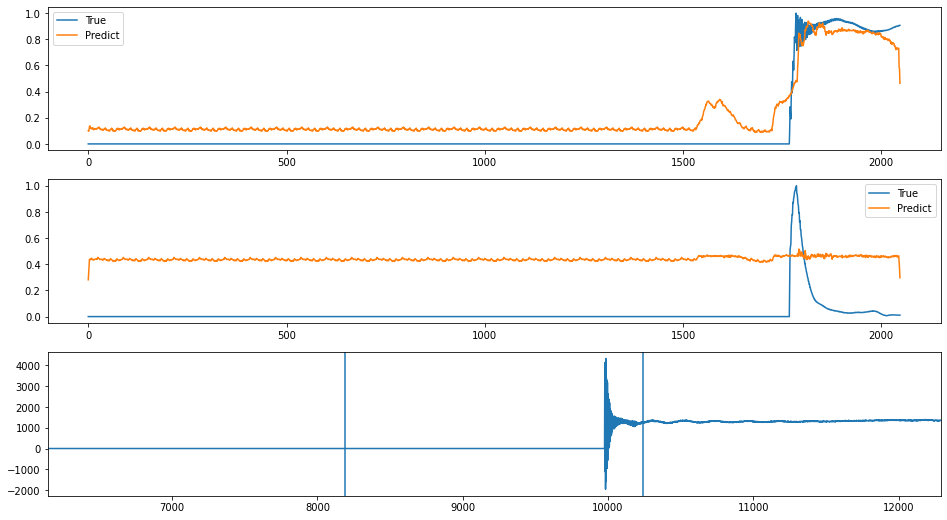

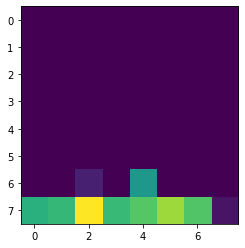

index: 215475
Error: 0.1014828109656357
type                                                         Inst
fill                                                         6351
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-31 15:14:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6351/...
n_bunches                                                     652
bunch_index                                                  1158
bunch_number                                                  623
ts_length                                                   65536
chunk                                                          27
Name: 6948, dtype: object


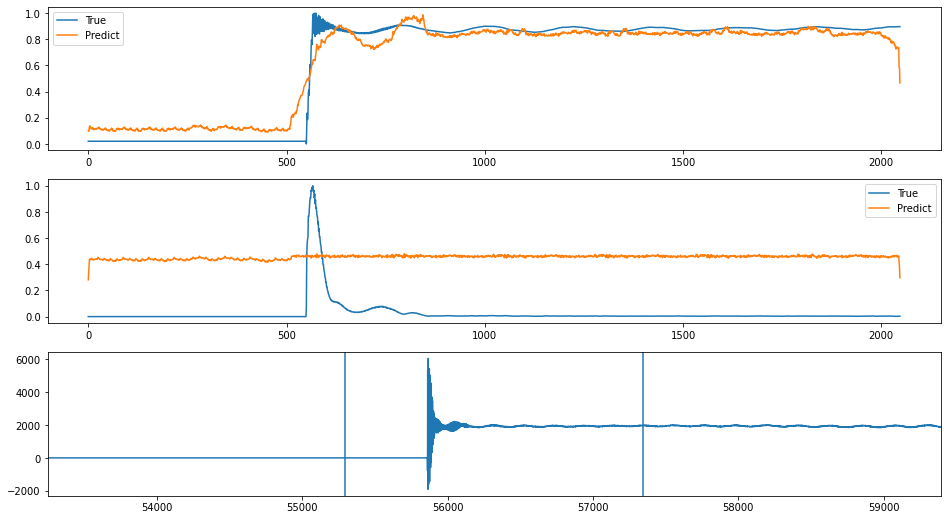

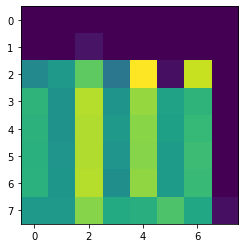

index: 30139
Error: 0.10138531453115374
type                                                         Inst
fill                                                         6411
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-22 21:27:32
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6411/...
n_bunches                                                     300
bunch_index                                                   384
bunch_number                                                  196
ts_length                                                   65536
chunk                                                           6
Name: 1764, dtype: object


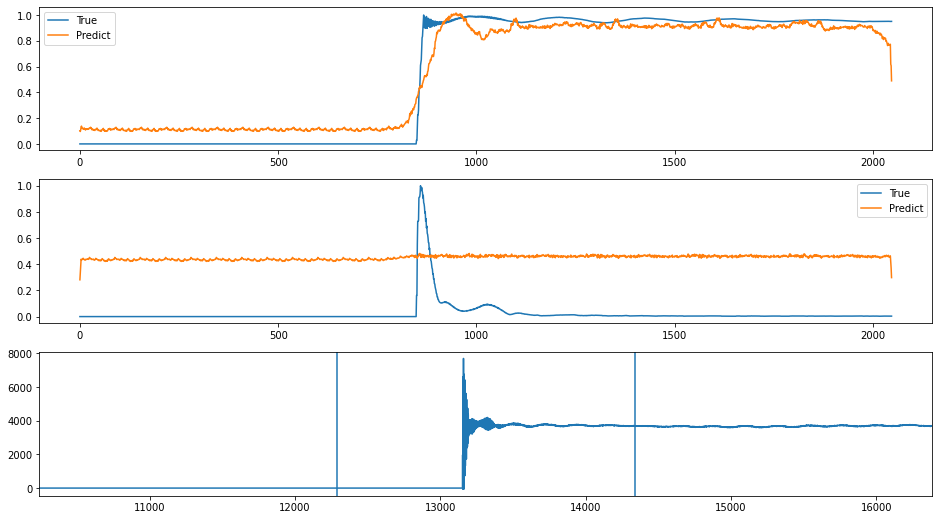

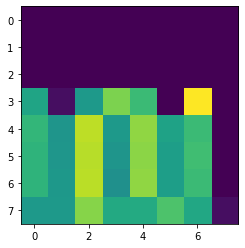

In [26]:
for i in range(1, 51):
    index = sorted_error_indices[-i]
    plot_train_index(index)

# Around the peak

In [27]:
error_around_peak = abs(train_error - hist_peak)
sorted_error_indices_around_peak = np.argsort(error_around_peak)

index: 223717
Error: 0.014402283657488479
type                                                         Inst
fill                                                         7466
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-11-22 21:57:15
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7466/...
n_bunches                                                     670
bunch_index                                                  2007
bunch_number                                                  420
ts_length                                                   65536
chunk                                                           4
Name: 1059, dtype: object


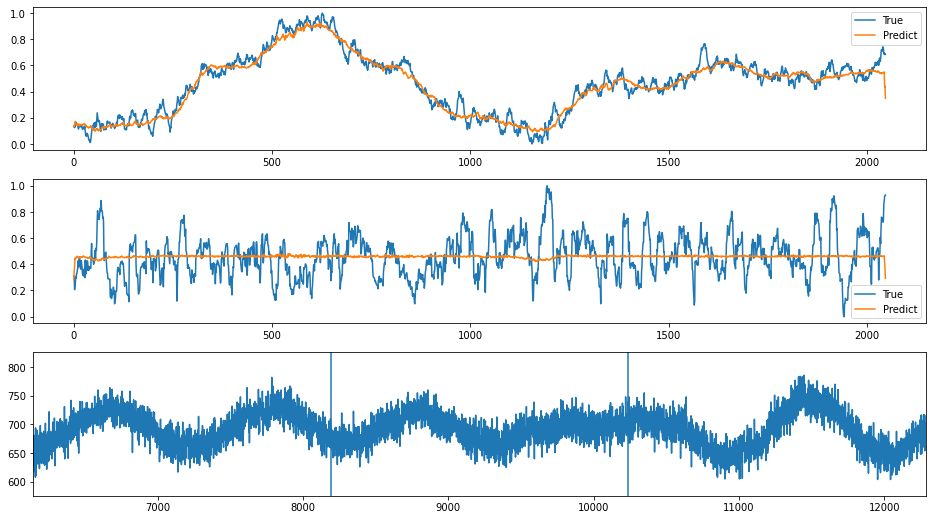

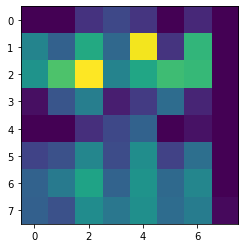

index: 75068
Error: 0.014402285052993681
type                                                         Inst
fill                                                         7264
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-07 00:49:58
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7264/...
n_bunches                                                     540
bunch_index                                                   464
bunch_number                                                  325
ts_length                                                   65536
chunk                                                          12
Name: 3195, dtype: object


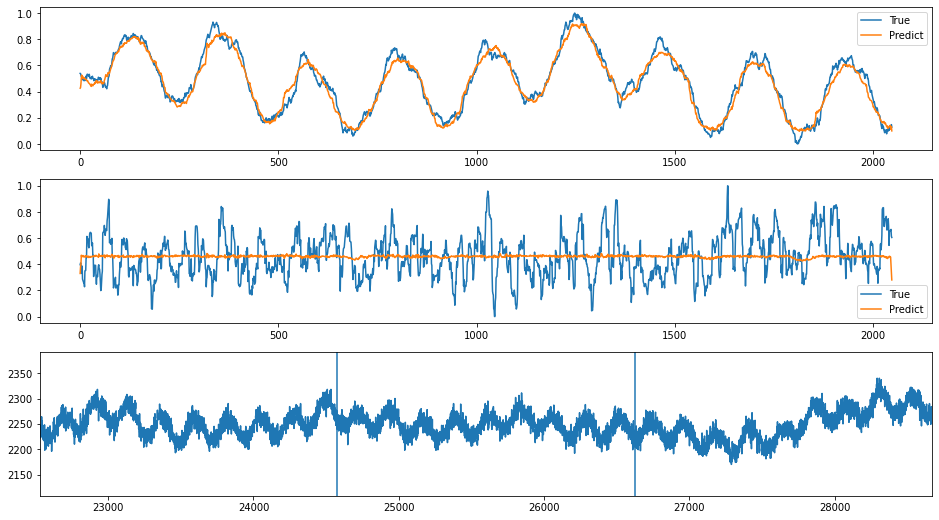

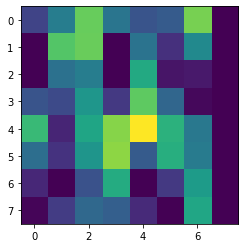

index: 50932
Error: 0.014402290337969538
type                                                         Inst
fill                                                         6594
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-04-22 10:04:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6594/...
n_bunches                                                     339
bunch_index                                                  2784
bunch_number                                                  283
ts_length                                                   65536
chunk                                                          20
Name: 5338, dtype: object


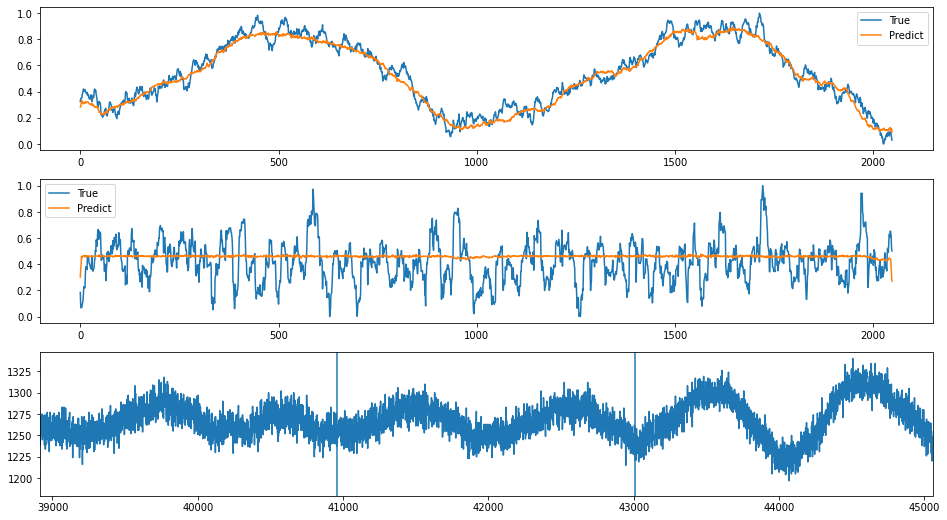

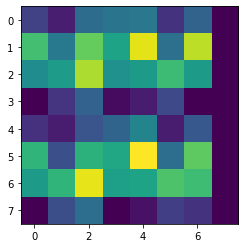

index: 235453
Error: 0.014402309071336692
type                                                         Inst
fill                                                         6344
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-29 01:12:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6344/...
n_bunches                                                    1868
bunch_index                                                   161
bunch_number                                                   73
ts_length                                                   65536
chunk                                                          29
Name: 7506, dtype: object


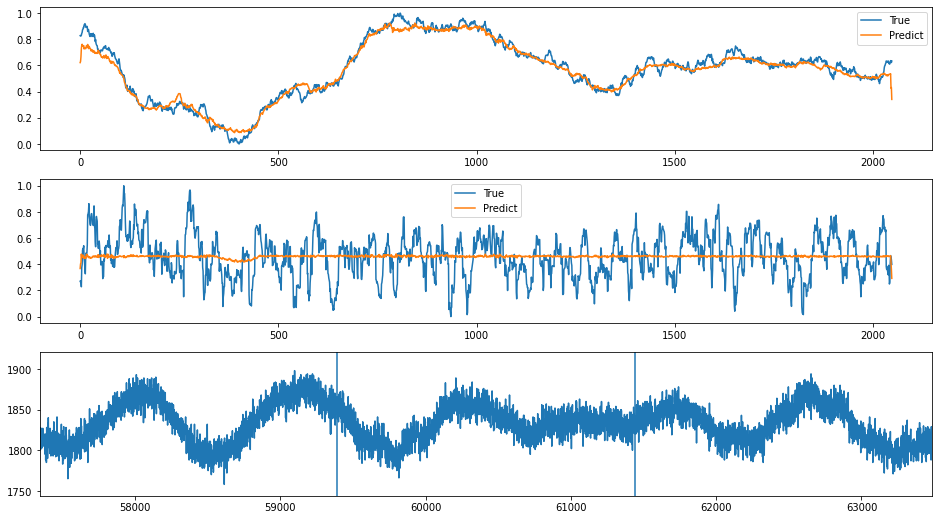

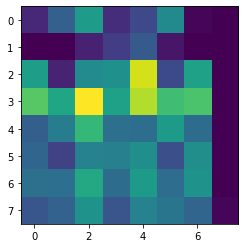

index: 325686
Error: 0.014402254230995505
type                                                         Inst
fill                                                         6663
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-05-10 14:43:15
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6663/...
n_bunches                                                    2556
bunch_index                                                  3035
bunch_number                                                 2249
ts_length                                                   65536
chunk                                                          23
Name: 5999, dtype: object


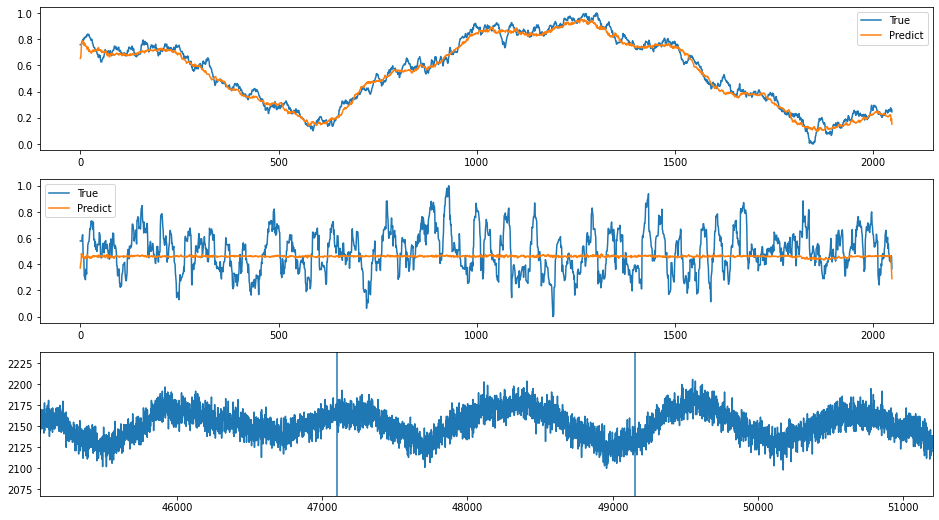

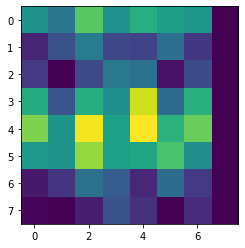

index: 222391
Error: 0.01440221102798456
type                                                         Inst
fill                                                         6981
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-07-26 14:22:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6981/...
n_bunches                                                      13
bunch_index                                                   840
bunch_number                                                    4
ts_length                                                   65536
chunk                                                          19
Name: 4941, dtype: object


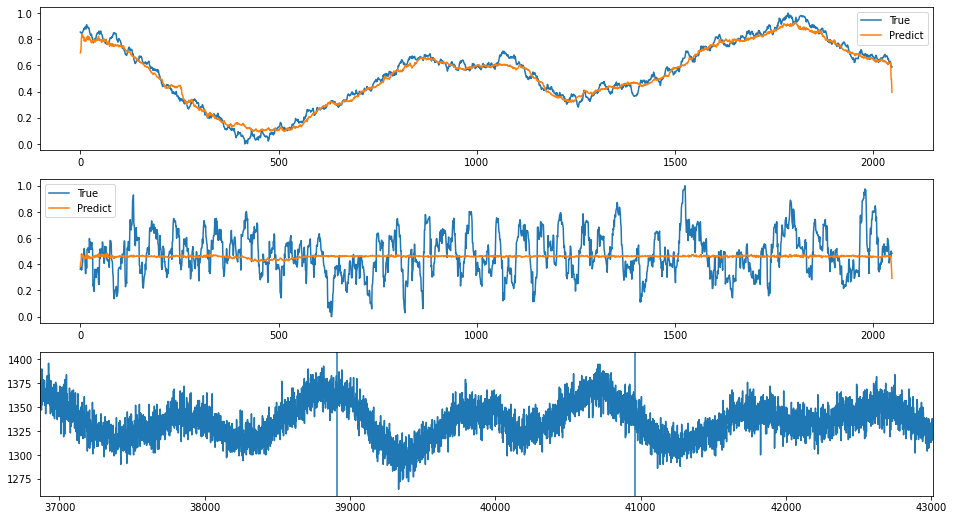

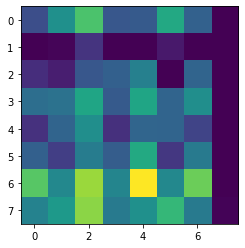

index: 9078
Error: 0.014402206147531595
type                                                         Inst
fill                                                         6360
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-03 16:39:13
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6360/...
n_bunches                                                    1868
bunch_index                                                  2932
bunch_number                                                 1576
ts_length                                                   65536
chunk                                                          21
Name: 5505, dtype: object


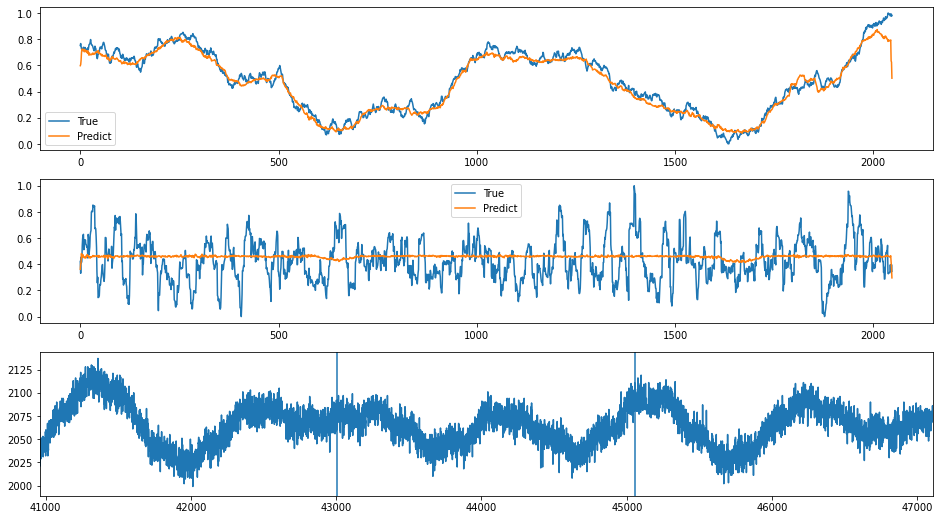

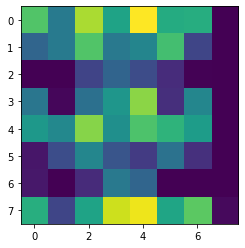

index: 153838
Error: 0.014402368059361967
type                                                         Inst
fill                                                         6666
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-05-10 22:01:39
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6666/...
n_bunches                                                     636
bunch_index                                                   109
bunch_number                                                   41
ts_length                                                   65536
chunk                                                          22
Name: 5869, dtype: object


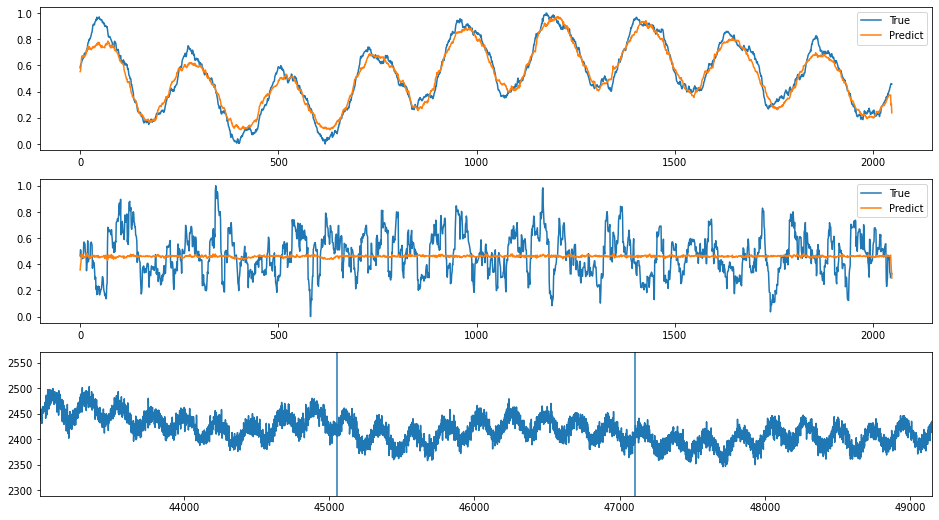

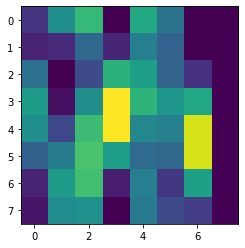

index: 339608
Error: 0.014402195421250152
type                                                         Inst
fill                                                         6763
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-06-06 23:51:36
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6763/...
n_bunches                                                     924
bunch_index                                                   807
bunch_number                                                  562
ts_length                                                   65536
chunk                                                          17
Name: 4426, dtype: object


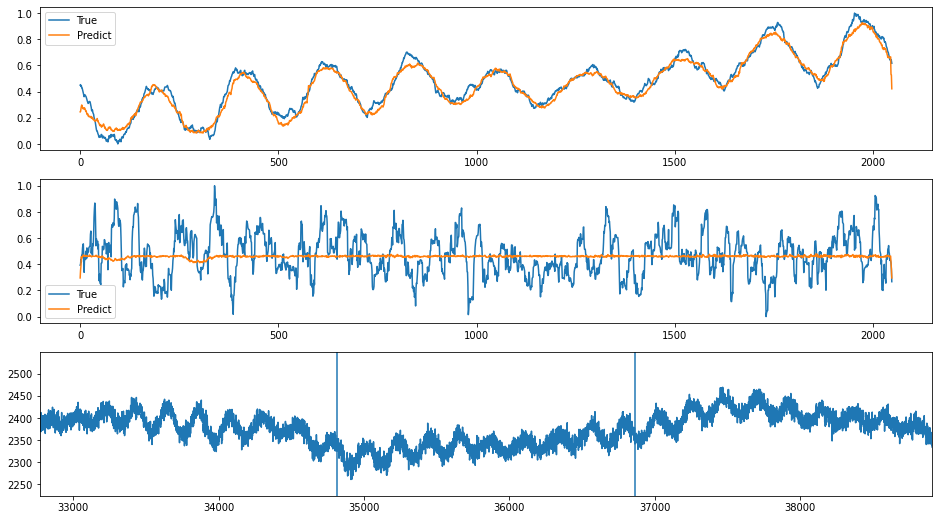

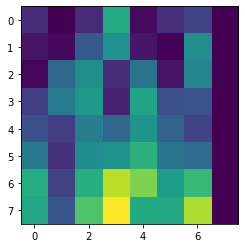

index: 360747
Error: 0.014402374583439275
type                                                         Inst
fill                                                         6253
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-09-28 12:51:00
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6253/...
n_bunches                                                      12
bunch_index                                                    14
bunch_number                                                    7
ts_length                                                   65536
chunk                                                           3
Name: 963, dtype: object


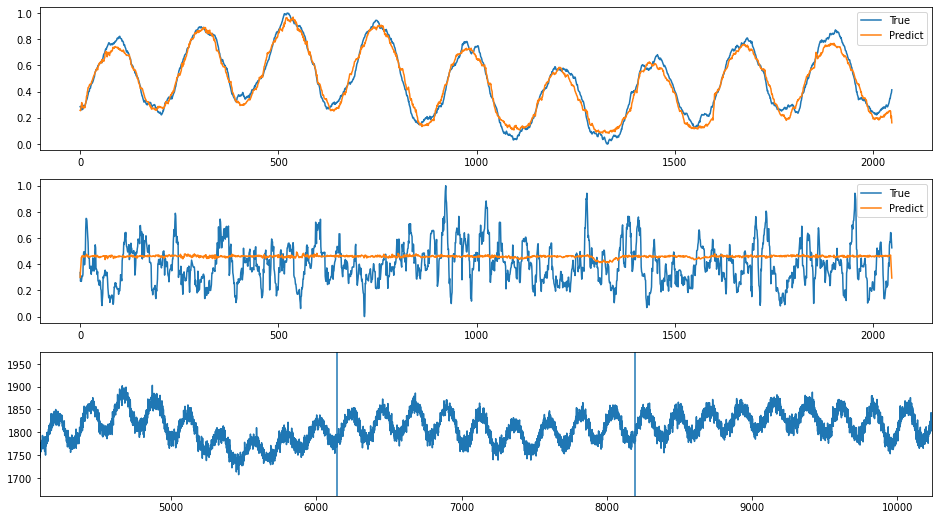

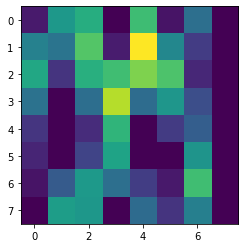

In [28]:
for i in range(10):
    index = sorted_error_indices_around_peak[i]
    plot_train_index(index)

# Around a point

In [29]:
# point = 

In [30]:
# error_around_peak = abs(train_error - point)
# sorted_error_indices_around_point = np.argsort(error_around_peak)

In [31]:
# for i in range(10):
#     index = sorted_error_indices_around_point[i]
#     plot_train_index(index)

# Clustering

In [32]:
indices = sorted_error_indices[-np.arange(1, 1024+1)]
encoding_true = train_data[indices]
encoding_pred = train_prediction[indices]
encoding_meta = train_meta.iloc[indices]
try:
    encoded = checker.encode(encoding_true)
except:
    encoded = np.array(checker.encoder(encoding_true)).squeeze()
encoded_2d = encoded.reshape(encoded.shape[0], -1)

In [33]:
encoded_2d.shape

(1024, 64)

In [34]:
print(encoded_2d[0])

[2.6520467 2.12028   3.6093254 2.1176252 3.3718762 2.276452  2.793091
 0.        2.638094  2.1481578 3.6310515 2.0665479 3.3659298 2.2721252
 2.7820854 0.        2.6521673 2.1537762 3.6428142 2.0300016 3.4024193
 2.2598326 2.7704086 0.        2.6978881 2.1718578 3.6943512 2.056166
 3.458717  2.3083656 2.7709107 0.        2.7009103 2.1595933 3.6902313
 2.078935  3.4486792 2.3319895 2.740696  0.        2.695074  2.1337173
 3.6585774 2.1228902 3.4264028 2.330318  2.7497635 0.        0.
 1.381205  1.8492625 0.        0.        1.8977463 0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.       ]


In [35]:
encoded_2d.min()

0.0

In [36]:
encoded_2d.max()

4.15557

In [37]:
def plot_clusters(cluster_indices):
    fig, axes = plt.subplots(encoding_true.shape[2], 1, figsize=(12, 3))
    if not isinstance(axes, np.ndarray):
        axes = np.array([axes])
    for i in range(encoding_true.shape[2]):
        axes[i].plot(encoding_true[cluster_indices][:,:, i].T,
                     linewidth=0,
                     marker=',',
                     alpha=0.5)
    return fig, axes

def plot_cluster_imgs(cluster_indices):
    fig, axes = plt.subplots(1, len(cluster_indices))
    if not isinstance(axes, np.ndarray):
        axes = np.array([axes])
    for i, img in enumerate(encoded[cluster_indices]):
        axes[i].imshow(img)
    return fig, axes

def plot_clusters_grid(cluster_indices):
    grid_size = int(np.sqrt(len(cluster_indices)))
    fig, axes = plt.subplots(grid_size, grid_size, figsize=(6, 6))
    if not isinstance(axes, np.ndarray):
        axes = np.array([axes])
    axes = axes.flatten()
    for i in range(len(axes)):
        axes[i].plot(encoding_true[cluster_indices[i]], linewidth=0, marker=',')
    return fig, axes

def plot_cluster_imgs_grid(cluster_indices):
    grid_size = int(np.sqrt(len(cluster_indices)))
    fig, axes = plt.subplots(grid_size, grid_size, figsize=(6, 6))
    if not isinstance(axes, np.ndarray):
        axes = np.array([axes])
    axes = axes.flatten()
    for i in range(len(axes)):
        axes[i].imshow(encoded[cluster_indices[i]])
    return fig, axes

def plot_avg_encoding(cluster_indices):
    plt.imshow(encoded[cluster_indices].mean(axis=0))

In [38]:
import sklearn
from sklearn.manifold import TSNE

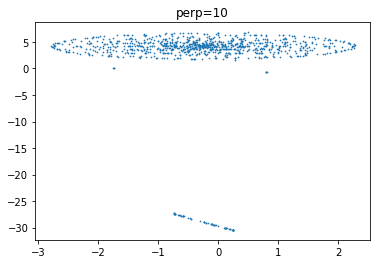

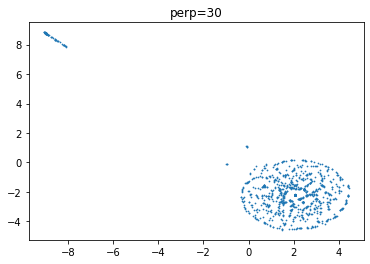

In [39]:
for perplexity in [10, 30]:
    tsne = TSNE(perplexity=perplexity)
    encoded_2d_tsne = tsne.fit_transform(encoded_2d)
    plt.scatter(encoded_2d_tsne[:, 0], encoded_2d_tsne[:, 1], marker='.', s=2)
    plt.title(f"perp={perplexity}")
    plt.show()

In [40]:
tsne = TSNE(perplexity=30)
encoded_2d_tsne = tsne.fit_transform(encoded_2d)

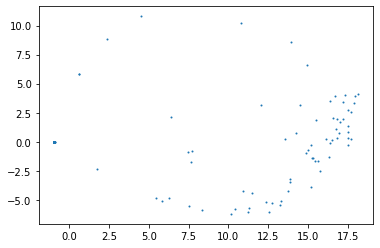

In [41]:
from sklearn.decomposition import PCA

pca = PCA(n_components=8)
encoded_2d_pca = pca.fit_transform(encoded_2d)
plt.scatter(encoded_2d_pca[:, 0], encoded_2d_pca[:, 1], marker='.', s=4)

In [42]:
pca.explained_variance_ratio_.sum()

0.9879792

In [43]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import matplotlib as mpl
mpl.style.use("default")

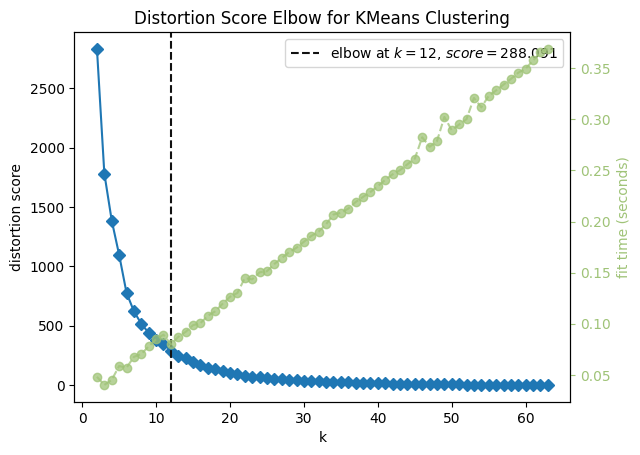

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [44]:
kmeans = KMeans()
viz = KElbowVisualizer(kmeans, k=(2, 64))
viz.fit(encoded_2d_pca)
viz.show()

-------------
n_clusters: 12
cluster 0
N samples: 955


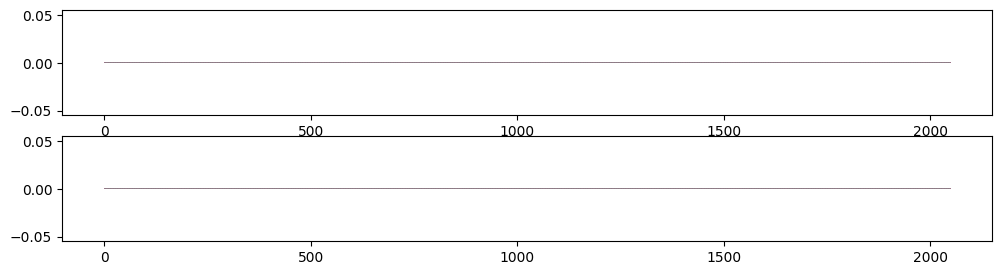

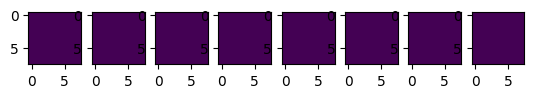

cluster 1
N samples: 14


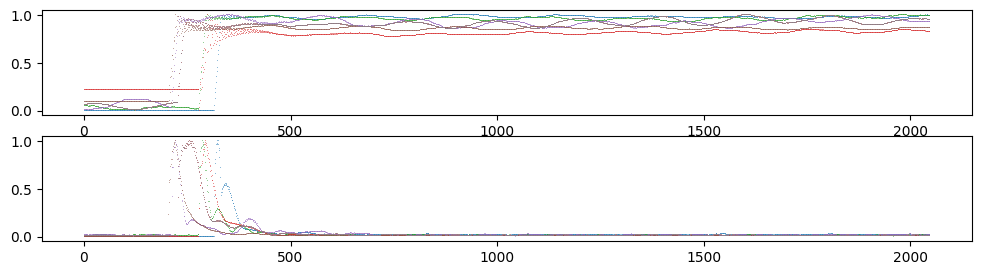

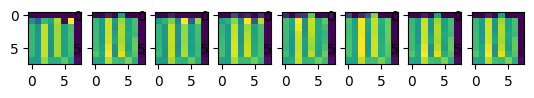

cluster 2
N samples: 7


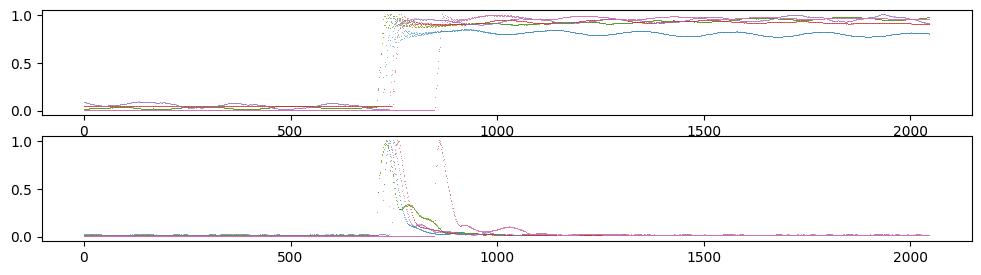

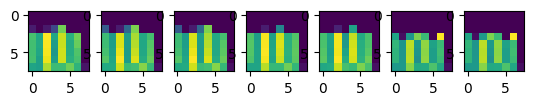

cluster 3
N samples: 5


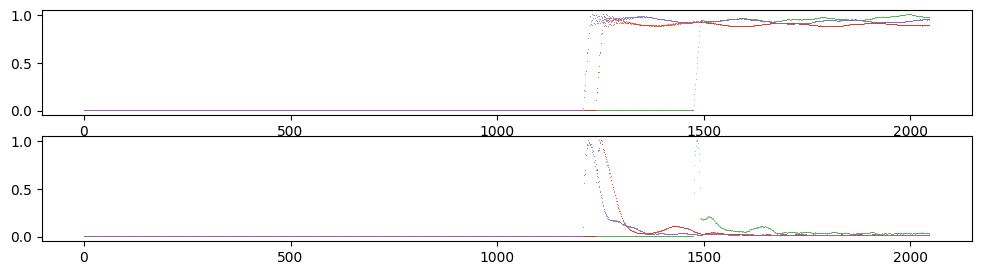

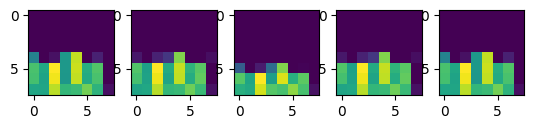

cluster 4
N samples: 10


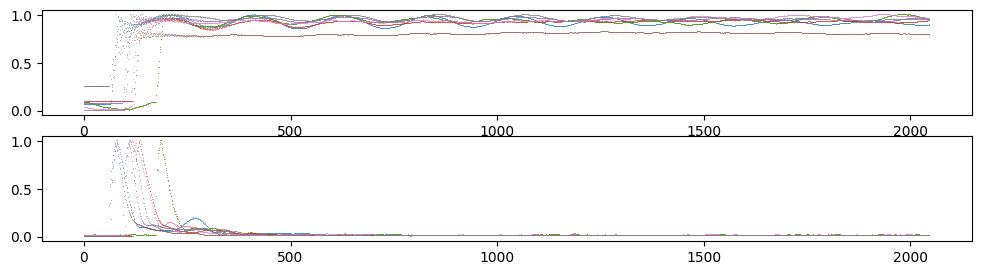

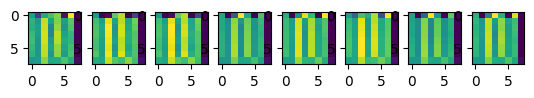

cluster 5
N samples: 1


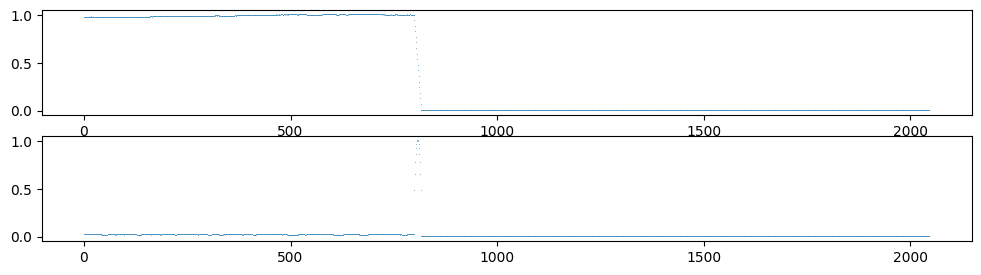

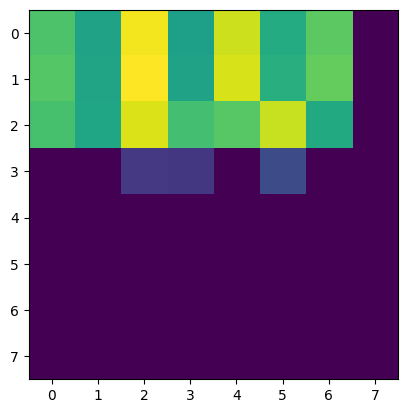

cluster 6
N samples: 3


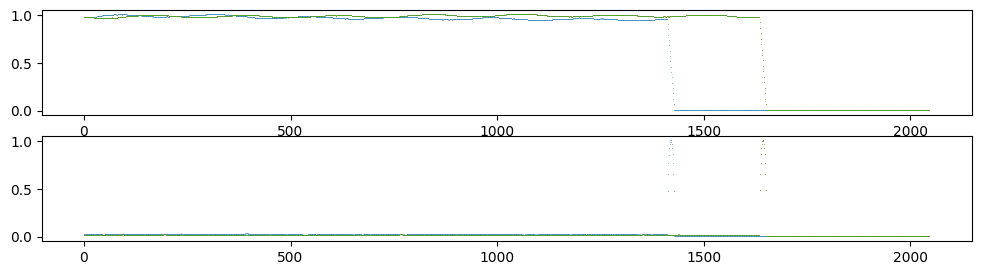

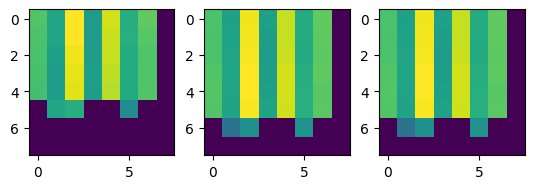

cluster 7
N samples: 13


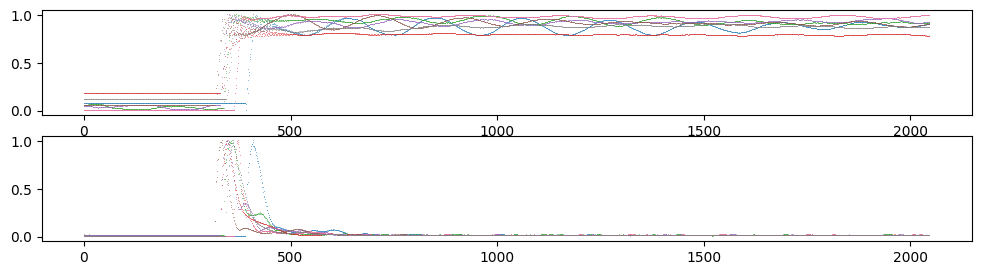

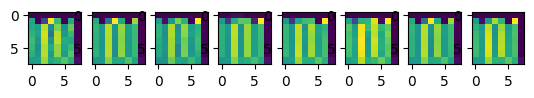

cluster 8
N samples: 4


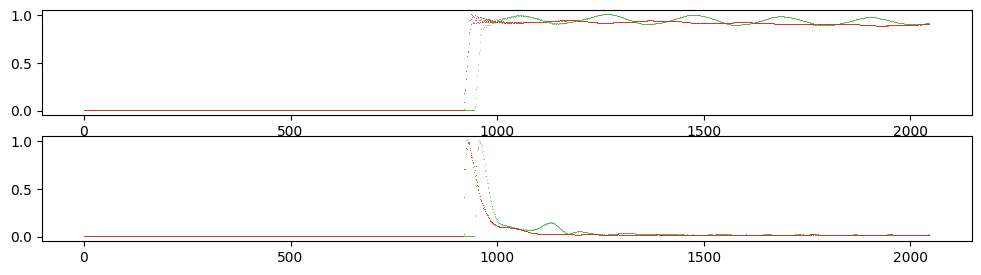

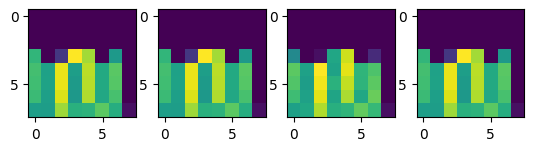

cluster 9
N samples: 4


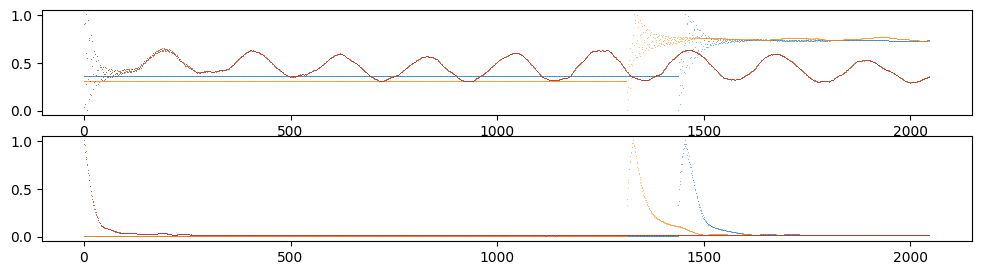

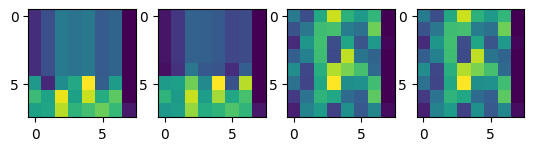

cluster 10
N samples: 5


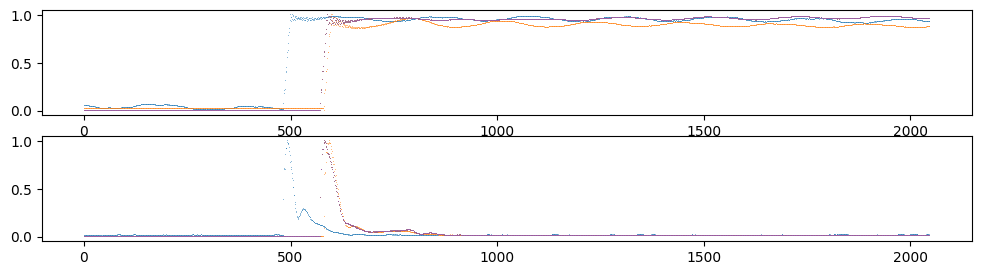

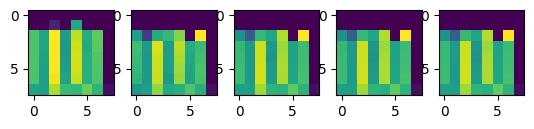

cluster 11
N samples: 3


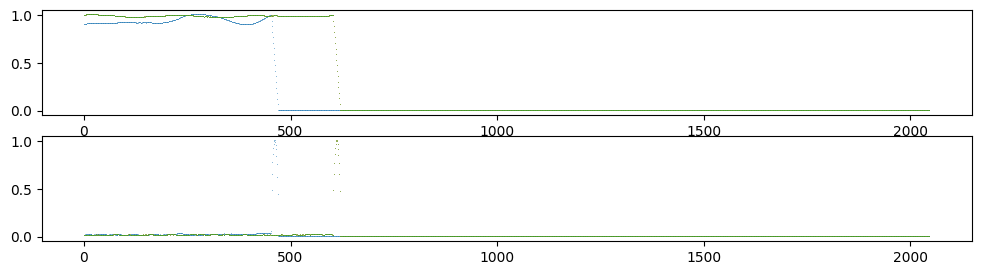

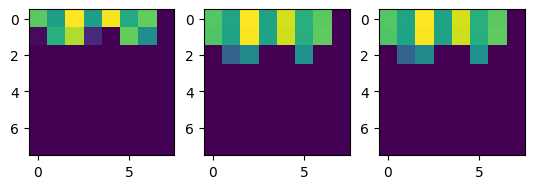

In [45]:
kmeans = KMeans(n_clusters=viz.elbow_value_)
clustering = kmeans.fit(encoded_2d_pca)
print('-------------')
print("n_clusters:", viz.elbow_value_)
for cluster in np.unique(clustering.labels_):
    cluster_indices = np.where(clustering.labels_ == cluster)[0]
    print("cluster", cluster)
    print(f"N samples: {len(cluster_indices)}")
    cluster_indices = np.random.choice(cluster_indices,
                                   min(8, len(cluster_indices)))
    
    fig, axes = plot_clusters(cluster_indices)
    plt.show()
    
    fig, axes = plot_cluster_imgs(cluster_indices)
    plt.show()

In [46]:
# from sklearn.cluster import DBSCAN
# dbscan = DBSCAN(eps=4)
# clustering = dbscan.fit(encoded_2d_tsne)
# sc = plt.scatter(encoded_2d_tsne[:, 0], encoded_2d_tsne[:, 1], marker='.', s=2, c=clustering.labels_, cmap='tab10')
# plt.legend(*sc.legend_elements())
# plt.show()
# for cluster in np.unique(clustering.labels_):
#     cluster_indices = np.where(clustering.labels_ == cluster)[0]
#     print("cluster", cluster)
#     fig, axes = plot_clusters(cluster_indices)
#     plt.show()
#     plot_avg_encoding(cluster_indices)
#     plt.show()